 <h1 style="color: orange; font-weight:700; text-decoration: underline;">Importation des Dataframes</h1>

1- Pour ce faire, il faut télécharger kaggle (avec pip install kaggle) et le API token de Kaggle \
2- Allez sur kaggle.com, créez un compte \
3- Puis téléchargez votre propre API token : cliquez sur votre profil -> Settings -> API -> Create new API token \
4- Ceci téléchargera alors une copie kaggle.json, il faut placer ce fichier dans la section Windows : C:\Users\<nom_utilisateur>\.kaggle\
5- (ou pour Mac/Linux : /home/<nom_utilisateur>/.kaggle/)

In [84]:
import pandas
import requests
import zipfile
import io

# %store permet de stocker des variables dans l'environnement du notebook 

# movies.csv utilisé pour le sujet #1 et #2
url = "https://www.kaggle.com/api/v1/datasets/download/danielgrijalvas/movies"
try:
    r = requests.get(url)
    r.raise_for_status()
    with zipfile.ZipFile(io.BytesIO(r.content), "r") as z:
        fichier = z.open(z.namelist()[0])
    
        df_movies = pandas.read_csv(fichier)
        %store df_movies
        print("Téléchargement et extraction des données réussis 1/7")
except requests.exceptions.RequestException as erreur:
    print(f"Erreur de connexion à l'adresse {url} : {erreur}")

# Netflix_titles.csv utilisé pour le sujet #1 et #2
url = "https://www.kaggle.com/api/v1/datasets/download/shivamb/netflix-shows"
try:
    r = requests.get(url)
    r.raise_for_status()
    with zipfile.ZipFile(io.BytesIO(r.content), "r") as z:
        fichier = z.open(z.namelist()[0])
    
        df_netflix_titles = pandas.read_csv(fichier)
        %store df_netflix_titles
        print("Téléchargement et extraction des données réussis 2/7")
except requests.exceptions.RequestException as erreur:
    print(f"Erreur de connexion à l'adresse {url} : {erreur}")

# Lecture d'un jeu de données contenant un top 1000 des films selon leur score IMDB pour le sujet #3
url = "https://www.kaggle.com/api/v1/datasets/download/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows"
try:
    r = requests.get(url)
    r.raise_for_status()
    with zipfile.ZipFile(io.BytesIO(r.content), "r") as z:
        fichier = z.open(z.namelist()[0])
    
        df_top1000_imdb = pandas.read_csv(fichier)
        %store df_top1000_imdb
        print("Téléchargement et extraction des données réussis 3/7")
except requests.exceptions.RequestException as erreur:
    print(f"Erreur de connexion à l'adresse {url} : {erreur}")
    
# Lecture d'un jeu de données contenant des films Netflix avec plusieurs caractéristiques associées.
url = "https://www.kaggle.com/api/v1/datasets/download/narayan63/netflix-popular-movies-dataset"
try:
    r = requests.get(url)
    r.raise_for_status()
    with zipfile.ZipFile(io.BytesIO(r.content), "r") as z:
        fichier = z.open(z.namelist()[0])
    
        df_netflix_pop_title = pandas.read_csv(fichier)
        %store df_netflix_pop_title
        print("Téléchargement et extraction des données réussis 4/7")
except requests.exceptions.RequestException as erreur:
    print(f"Erreur de connexion à l'adresse {url} : {erreur}")

# Lecture d'un jeu de données contenant des films avec leur score venant de Rotten Tomatoes et la plateforme sur laquelles ils sont. 
url = "https://www.kaggle.com/api/v1/datasets/download/ruchi798/movies-on-netflix-prime-video-hulu-and-disney"
try:
    r = requests.get(url)
    r.raise_for_status()
    with zipfile.ZipFile(io.BytesIO(r.content), "r") as z:
        fichier = z.open(z.namelist()[0])
    
        df_movies_diff_plat = pandas.read_csv(fichier)
        %store df_movies_diff_plat
        print("Téléchargement et extraction des données réussis 5/7")
except requests.exceptions.RequestException as erreur:
    print(f"Erreur de connexion à l'adresse {url} : {erreur}")

# Lecture d'un jeu de données pour le sujet #4
url = "https://www.netflix.com/tudum/top10/data/all-weeks-global.tsv"
try:
    r = requests.get(url)
    r.raise_for_status()
    df_top10_global = pandas.read_csv(io.StringIO(r.text), sep='\t')
    %store df_top10_global
    print("Téléchargement et extraction des données réussis 6/7")

except requests.exceptions.RequestException as erreur:
    print(f"Erreur de connexion à l'adresse {url} : {erreur}")

# Lecture d'un jeu de données pour le sujet #4
url = "https://www.kaggle.com/api/v1/datasets/download/victorsoeiro/netflix-tv-shows-and-movies/titles.csv"
try:
    r = requests.get(url)
    r.raise_for_status()
    with zipfile.ZipFile(io.BytesIO(r.content), "r") as z:
        fichier = z.open(z.namelist()[0])
    
        df_titlescsv = pandas.read_csv(fichier)
        %store df_titlescsv
        print("Téléchargement et extraction des données réussis 7/7")
        
except requests.exceptions.RequestException as erreur:
    print(f"Erreur de connexion à l'adresse {url} : {erreur}")


Stored 'df_movies' (DataFrame)
Téléchargement et extraction des données réussis 1/7
Stored 'df_netflix_titles' (DataFrame)
Téléchargement et extraction des données réussis 2/7
Stored 'df_top1000_imdb' (DataFrame)
Téléchargement et extraction des données réussis 3/7
Stored 'df_netflix_pop_title' (DataFrame)
Téléchargement et extraction des données réussis 4/7
Stored 'df_movies_diff_plat' (DataFrame)
Téléchargement et extraction des données réussis 5/7
Stored 'df_top10_global' (DataFrame)
Téléchargement et extraction des données réussis 6/7
Stored 'df_titlescsv' (DataFrame)
Téléchargement et extraction des données réussis 7/7


 <h1 style="color: orange; font-weight:700; text-decoration: underline;">SUJET 1 : IMPACT DU BUDGET SUR LA POPULARITÉ</h1> 
  
DataFrames utilisés : df_movies et netflix_titles 

## <font color='yellow'>**Vérification des films communs entres les DataFrames df_movies et netflix_titles**</font>  

In [48]:
#Distance de Jaccard afin de vérifier s'il y a des films en commun entre les deux DataFrames 
from nltk.metrics.distance import jaccard_distance 

set1 = set(df_movies['name'])
set2 = set(df_netflix_titles['title'])
print("Distance : ", jaccard_distance(set1, set2))

films_communs = set1.intersection(set2)
nombre_identiques = len(films_communs)
print(f"Le nombre de films identiques est : {nombre_identiques}")

Distance :  0.9299718051275326
Le nombre de films identiques est : 1068


Bien que la distance de Jaccard soit de **0.93**, ce qui est très proche de 1 et ce qui signifie qu'il y a peu de films en communs, lorsqu'on calcule le nombre de films identitiques entre les deux DataFrames, on remarque qu'il y en a 1068 ce qui est un nombre assez large afin d'y faire notre analyse. 

## <font color='aqua'>**BUDGET VS SCORE**</font> 

### En nuage de points 

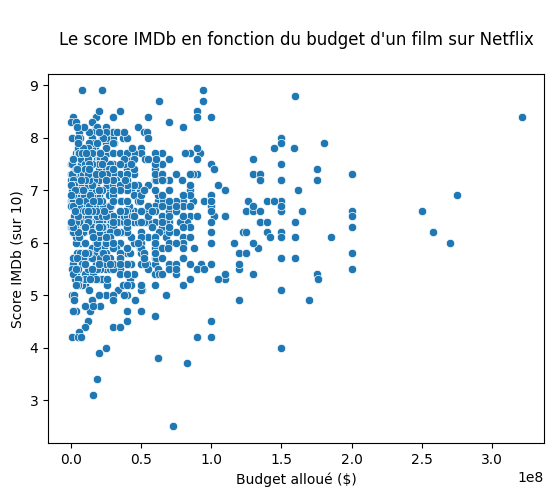

In [26]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

# Garder les colonnes pertinentes de chaque DataFrame 
df_movies2 = df_movies.drop(columns=['company', 'country', 'director', 'gross', 'rating', 'released', 'runtime', 'votes', 'star', 'writer', 'year'])
df_netflix_titles2 = df_netflix_titles.drop(columns=['type', 'director', 'cast', 'country', 'date_added', 
                                            'release_year', 'rating', 'duration', 'listed_in', 'description'])

# Enlever les lignes qui ne contiennent pas de valeur dans la colonne 'budget'
df_movies2['budget'] = df_movies2['budget'].fillna('ND')
df_movies2 = df_movies2.drop(df_movies2[df_movies2['budget']== 'ND'].index)

# Joindre les 2 DataFrames
df_merged2 = df_movies2.join(df_netflix_titles2.set_index('title'), on='name')

# Ne garder que les lignes qui ont des valeurs contenues dans la colonne show_id (cela signifie que le film est contenu dans les 2 df)
df_merged2['show_id'] = df_merged2['show_id'].fillna('ND')
df_merged2 = df_movies2.drop(df_merged2[df_merged2['show_id']== 'ND'].index)

# Créer le nuage de points et ajuster les titres 
sbn.scatterplot(y='score', x='budget', data=df_merged2)
plt.ylabel('Score IMDb (sur 10)')
plt.title("\nLe score IMDb en fonction du budget d'un film sur Netflix\n")
plt.xlabel('Budget alloué ($)')

# Télécharger le graphique en pdf 
plt.savefig("IMDb_vs_budget_scatterplot.pdf", format='pdf')

Un nuage de points a premièrement été créé afin d'illustrer le score IMDb selon le budget alloué. Cependant, les points sont très collés les uns aux autres. Ainsi, nous ne pouvons pas former de conclusion fiable et précise. Il serait souhaitable de faire un barplot ou boxplot afin de mieux observer la distribution des score IMDb selon le budget. D'autant plus qu'il serait souhaitable de regrouper le budget en catégorie, en intervalle afin de mieux observer une tendance s'il y en a une. On aurait pu essayer d'analyser le score IMDB en fonction du budget alloué au film selon le genre, cependant, la distribution des films pour chaque genre et pour chaque catégorie de budget n'est pas égale afin d'y faire une analyse précise et fiable. 

### En boxplot et barplot

5497
Le nombre de films utilisés est de 903
budget_category
[10 000 000, 50 000 000[     463
[50 000 000, 100 000 000[    183
[1 000 000, 10 000 000[      144
[100 000 000, infinity[       97
[0, 1 000 000[                16
Name: count, dtype: int64


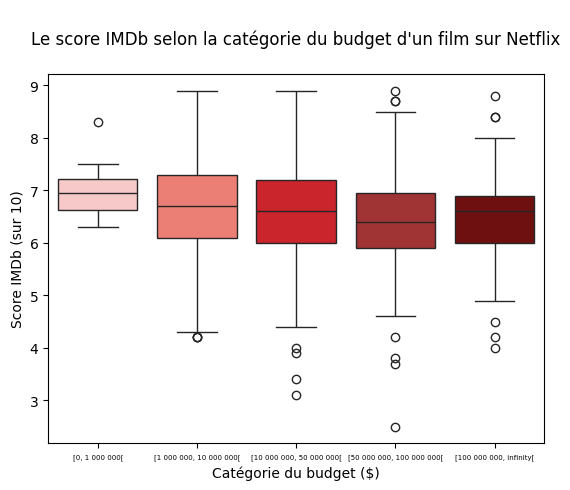

In [28]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

# Garder les colonnes pertinentes de chaque DataFrame (garder budget, genre, name et score pour df_movies et title et show_id pour netflix_titles)
df_movies3 = df_movies.drop(columns=['company', 'country', 'director', 'gross', 'rating', 'released', 'runtime', 'votes', 'star', 'writer', 'year'])
df_netflix_titles3 = df_netflix_titles.drop(columns=['type', 'director', 'cast', 'country', 'date_added', 
                                            'release_year', 'rating', 'duration', 'listed_in', 'description'])

# Enlever les lignes qui ne contiennent pas de valeur dans la colonne 'budget'
df_movies3['budget'] = df_movies3['budget'].fillna('ND')
df_movies3 = df_movies3.drop(df_movies3[df_movies3['budget']== 'ND'].index)

# Joindre les 2 DataFrames
df_merged3 = df_movies3.join(df_netflix_titles3.set_index('title'), on='name')
print(len(df_merged3))

# Ne garder que les lignes qui ont des valeurs contenues dans la colonne show_id (cela signifie que le film est contenu dans les 2 DataFrames)
df_merged3['show_id'] = df_merged3['show_id'].fillna('ND')
df_merged3 = df_merged3.drop(df_merged3[df_merged3['show_id']== 'ND'].index)

# Afin de créer des graphiques qui sont plus lisibles et organisés, on crée une définition qui catérgorisera les budgets de chaque film dans 
# leur catégorie respective 
def budget_cat(x):
    if x < 1000000:
        return "[0, 1 000 000["
    elif  1000000 <= x < 10000000:
        return "[1 000 000, 10 000 000["
    elif 10000000 <= x < 50000000:
        return "[10 000 000, 50 000 000["
    elif 50000000 <= x < 100000000:
        return "[50 000 000, 100 000 000["
    elif 100000000 <= x:
        return "[100 000 000, infinity["
        
df_merged3['budget_category'] = df_merged3['budget'].apply(budget_cat)

# Calculer le nombre de lignes (nombre de films utilisés dans cette analyse)
print(f"Le nombre de films utilisés est de {len(df_merged3)}") 

# Associer les couleurs spécifiques pour chaque catégorie de budget
# Le site utilisé pour personnalisé les couleurs avec les codes respectifs est : https://htmlcolorcodes.com/
palette = {
    "[0, 1 000 000[": "#FFC1C1",  
    "[1 000 000, 10 000 000[": "#FF6F61",  
    "[10 000 000, 50 000 000[": "#E50914",  
    "[50 000 000, 100 000 000[": "#B22222",  
    "[100 000 000, infinity[": "#7F0000"  
}

# Création du boxplot en tenant compte des couleurs et leur ordre selon la catégorie de budget
sbn.boxplot(
    y='score', 
    x='budget_category', 
    hue = 'budget_category',
    data=df_merged3, 
    order=["[0, 1 000 000[", "[1 000 000, 10 000 000[", "[10 000 000, 50 000 000[", "[50 000 000, 100 000 000[", "[100 000 000, infinity["],
    palette=palette,  # Applique les couleurs définies
    legend = False 
)

#Ajuster la taille de l'écriture 
plt.xticks(fontsize=5)
plt.xlabel("Catégorie du budget ($)")
plt.title("\nLe score IMDb selon la catégorie du budget d'un film sur Netflix\n")
plt.ylabel("Score IMDb (sur 10)")

# Le barplot n'est pas un graphique convenable afin d'illustrer le score selon le budget puisqu'on perd la précision de la distribution des données
#Le boxplot permet de visualiser la médiane et les données aberrantes
# On voit qu'en pus de trier les films par budget et par genre que la distribution n'est pas égale, donc l'analyse ne serait pas fiable 
### df_merged1 = df_merged.groupby(['genre', 'budget_category'])[['score']].mean()
### sbn.barplot(y='score', x='budget_category', hue='genre', data=df_merged1, order=["[0, 1 000 000[","[1 000 000, 10 000 000[", "[10 000 000, 50 000 000[", \
###                                                                 "[50 000 000, 100 000 000[", "[100 000 000, infinity["])

# Calculer le nombre de films qui se retrouvent dans chaque catégorie de budget
print(df_merged3['budget_category'].value_counts())

#Sauvegarder l'image afin d'avoir la meilleure qualité possible pour le poster 
plt.savefig("IMDb_vs_budget_boxplot.pdf", format='pdf', bbox_inches='tight')

Analyse des données du graphique "Le score IMDb selon la catégorie du budget" : Le score IMDb ne varie pas drastiquement d'une catégorie de budget à l'autre. En effet, les résultats démontrent que la médiane reste aux alentours d'environ 6.5 selon le score IMDb, peu importe le montant du budget. Les limites de cette analyse sont les suivantes: il n'y a pas une distribution égale de films selon la catégorie de budget. Par conséquent, les résultats peuvent être biaisés et les comparaisons moins représentatives. 

 <h2 style="color: aqua; font-weight:700;">BUDGET VS REVENU</h2> 

### En nuage de points 

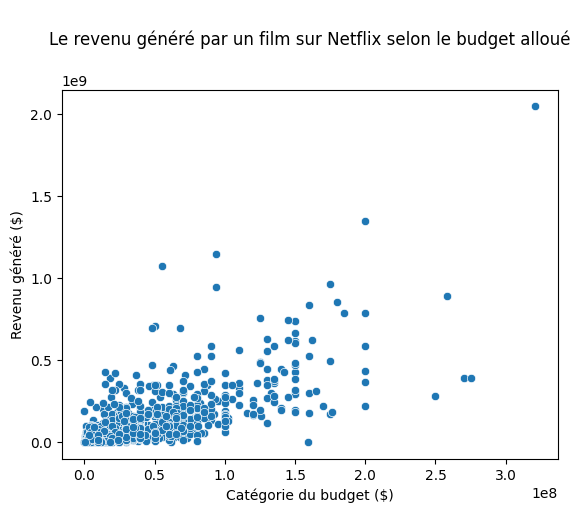

In [30]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

# Garder les colonnes pertinentes de chaque DataFrame 
df_movies4 = df_movies.drop(columns=['company', 'country', 'director', 'score', 'rating', 'released', 'runtime', 'votes', 'star', 'writer', 'year'])
df_netflix_titles4 = df_netflix_titles.drop(columns=['type', 'director', 'cast', 'country', 'date_added', 
                                            'release_year', 'rating', 'duration', 'listed_in', 'description'])

# Enlever les lignes qui ne contiennent pas de valeur dans la colonne 'budget'
df_movies4['budget'] = df_movies4['budget'].fillna('ND')
df_movies4 = df_movies4.drop(df_movies4[df_movies4['budget']== 'ND'].index)

# Joindre les 2 DataFrames
df_merged4 = df_movies4.join(df_netflix_titles4.set_index('title'), on='name')

# Ne garder que les lignes qui ont des valeurs contenues dans la colonne show_id (cela signifie que le film est contenu dans les 2 df)
df_merged4['show_id'] = df_merged4['show_id'].fillna('ND')
df_merged4 = df_movies4.drop(df_merged4[df_merged4['show_id']== 'ND'].index)

# Générer le nuage de points et y ajuster les titres 
# Avec hue = 'genre' :
# sbn.scatterplot(y='gross', x='budget', hue='genre', data=df_merged)
sbn.scatterplot(y='gross', x='budget', data=df_merged4)
plt.xlabel("Catégorie du budget ($)")
plt.title("\nLe revenu généré par un film sur Netflix selon le budget alloué\n")
plt.ylabel("Revenu généré ($)")

# Sauvegarder le graphique en format pdf 
plt.savefig("Revenu_vs_budget_scatterplot.pdf", format='pdf', bbox_inches='tight')

Encore une fois, le nuage de points (Revenu généré vs budget alloué) n'est pas adéquat afin de montrer la relation entre les deux variables. En effet, il faudrait plutôt créer des intervalles de budget ce qui permettrait d'avoir une meilleure analyse plus précise. Un barplot serait plus envisageable. 

### En barplot

903
                                            gross  count
genre     budget_category                               
Action    [1 000 000, 10 000 000[    1.904261e+07     13
          [10 000 000, 50 000 000[   8.288054e+07    124
          [100 000 000, infinity[    4.271525e+08     51
          [50 000 000, 100 000 000[  1.830012e+08     73
Adventure [10 000 000, 50 000 000[   7.142072e+07     27
          [50 000 000, 100 000 000[  2.055060e+08     14
Animation [100 000 000, infinity[    3.955550e+08     25
          [50 000 000, 100 000 000[  2.228017e+08     16
Biography [1 000 000, 10 000 000[    2.846715e+07     10
          [10 000 000, 50 000 000[   7.220895e+07     48
Comedy    [1 000 000, 10 000 000[    2.891976e+07     39
          [10 000 000, 50 000 000[   7.049240e+07    107
          [50 000 000, 100 000 000[  1.683870e+08     36
Crime     [1 000 000, 10 000 000[    4.936391e+07     14
          [10 000 000, 50 000 000[   7.748517e+07     36
          [50 000 000, 100 

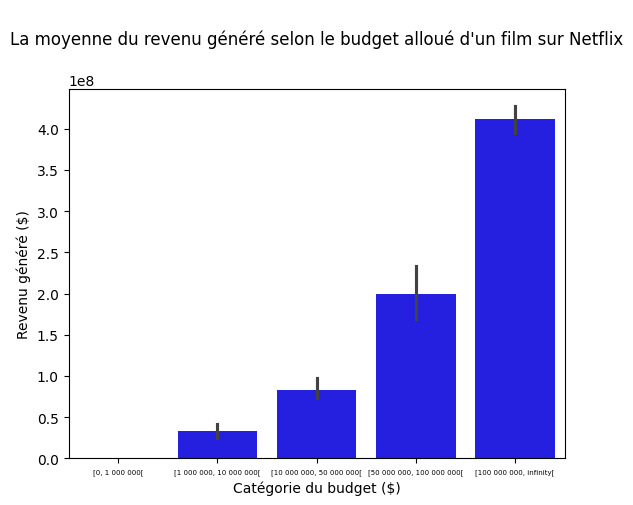

In [32]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

# Garder les colonnes pertinentes de chaque DataFrame 
df_movies5 = df_movies.drop(columns=['company', 'country', 'director', 'score', 'rating', 'released', 'runtime', 'votes', 'star', 'writer', 'year'])
df_netflix_titles5 = df_netflix_titles.drop(columns=['type', 'director', 'cast', 'country', 'date_added', 
                                            'release_year', 'rating', 'duration', 'listed_in', 'description'])

# Enlever les lignes qui ne contiennent pas de valeur dans la colonne 'budget'
df_movies5['budget'] = df_movies5['budget'].fillna('ND')
df_movies5 = df_movies5.drop(df_movies5[df_movies5['budget']== 'ND'].index)

# Joindre les 2 DataFrames
df_merged5 = df_movies5.join(df_netflix_titles5.set_index('title'), on='name')

# Ne garder que les lignes qui ont des valeurs contenues dans la colonne show_id (cela signifie que le film est contenu dans les 2 df)
df_merged5['show_id'] = df_merged5['show_id'].fillna('ND')
df_merged5 = df_movies5.drop(df_merged5[df_merged5['show_id']== 'ND'].index)

# Categorie de budget
def budget_cat(x):
    if x < 1000000:
        return "[0, 1 000 000["
    elif  1000000 <= x < 10000000:
        return "[1 000 000, 10 000 000["
    elif 10000000 <= x < 50000000:
        return "[10 000 000, 50 000 000["
    elif 50000000 <= x < 100000000:
        return "[50 000 000, 100 000 000["
    elif 100000000 <= x:
        return "[100 000 000, infinity["
        
df_merged5['budget_category'] = df_merged5['budget'].apply(budget_cat)

# Calculer le nombre de lignes (nombre de films utilisés dans cette analyse)
print(len(df_merged5)) 

# Visualiser les données et la relation entre les variables
#sbn.boxplot(y='score', x='budget_category', hue='genre', data=df_merged, order=["[0, 1 000 000[","[1 000 000, 10 000 000[", "[10 000 000, 50 000 000[", \
#                                                                  "[50 000 000, 100 000 000[", "[100 000 000, infinity["])

df_merged_copy = df_merged5.groupby(['genre', 'budget_category'])[['gross']].mean()

# Ajouter une colonne pour le nombre de données utilisées
df_merged_copy['count'] = df_merged5.groupby(['genre', 'budget_category'])['gross'].count()
# Supprimer les lignes où count est inférieur à 10
df_merged_copy = df_merged_copy[df_merged_copy['count'] >= 10]
# Afficher le résultat
print(df_merged_copy)

# On pourrait ajouter hue = 'genre', par contre on observe qu'il n'y a pas assez de données pour chaque genre et pour chaque catégorie de budget
# Pour changer la couleur des barres, il faut rajouter hue = x, palette = 'couleur', et legend = False 
sbn.barplot(y='gross', 
            x='budget_category', 
            data=df_merged_copy, 
            order=["[0, 1 000 000[","[1 000 000, 10 000 000[", "[10 000 000, 50 000 000[", "[50 000 000, 100 000 000[", "[100 000 000, infinity["],
            color = '#0700ff',
            legend = False
           )
            
plt.xticks(fontsize=5)
plt.xlabel("Catégorie du budget ($)")
plt.title("\nLa moyenne du revenu généré selon le budget alloué d'un film sur Netflix\n")
plt.ylabel("Revenu généré ($)")

# Sauvegarder le graphique en format pdf 
plt.savefig("Revenu_vs_budget_barplot.pdf", format='pdf', bbox_inches='tight')

Conclusion budget vs revenu : Plus un film a un gros budget, plus il génère du revenu et donc, plus le film est populaire.

## <font color='aqua'>**BUDGET VS NOMBRE DE VOTES**</font> 

### En barplot

903


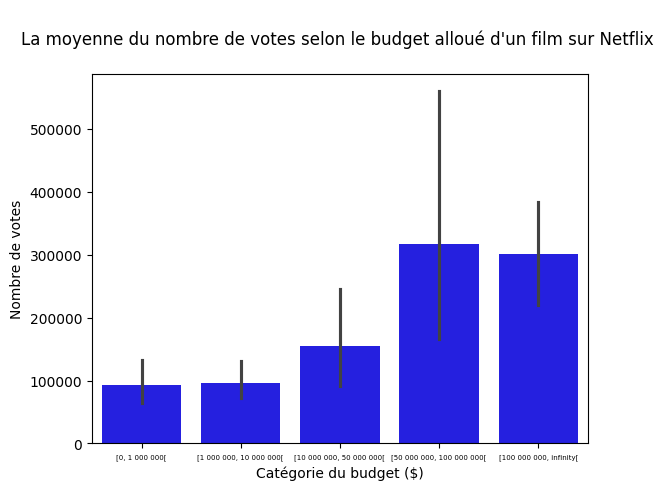

In [34]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

# Garder les colonnes pertinentes de chaque DataFrame 
df_movies6 = df_movies.drop(columns=['company', 'country', 'director', 'score', 'rating', 'released', 'runtime', 'gross', 'star', 'writer', 'year'])
df_netflix_titles6 = df_netflix_titles.drop(columns=['type', 'director', 'cast', 'country', 'date_added', 
                                            'release_year', 'rating', 'duration', 'listed_in', 'description'])

# Enlever les lignes qui ne contiennent pas de valeur dans la colonne 'budget'
df_movies6['budget'] = df_movies6['budget'].fillna('ND')
df_movies6 = df_movies.drop(df_movies6[df_movies6['budget']== 'ND'].index)

# Joindre les 2 DataFrames
df_merged6 = df_movies6.join(df_netflix_titles6.set_index('title'), on='name')

# Ne garder que les lignes qui ont des valeurs contenues dans la colonne show_id (cela signifie que le film est contenu dans les 2 df)
df_merged6['show_id'] = df_merged6['show_id'].fillna('ND')
df_merged6 = df_movies6.drop(df_merged6[df_merged6['show_id']== 'ND'].index)

# Categorie de budget
def budget_cat(x):
    if x < 1000000:
        return "[0, 1 000 000["
    elif  1000000 <= x < 10000000:
        return "[1 000 000, 10 000 000["
    elif 10000000 <= x < 50000000:
        return "[10 000 000, 50 000 000["
    elif 50000000 <= x < 100000000:
        return "[50 000 000, 100 000 000["
    elif 100000000 <= x:
        return "[100 000 000, infinity["
        
df_merged6['budget_category'] = df_merged6['budget'].apply(budget_cat)

# Calculer le nombre de lignes (nombre de films utilisés dans cette analyse)
print(len(df_merged6)) 

# Visualiser les données et la relation entre les variables
#sbn.boxplot(y='votes', x='budget_category', hue='genre', data=df_merged, order=["[0, 1 000 000[","[1 000 000, 10 000 000[", "[10 000 000, 50 000 000[", \
#                                                                  "[50 000 000, 100 000 000[", "[100 000 000, infinity["])
#plt.xticks(fontsize=5)

#Calculer la moyenne du nombre de votes par genre et par categorie de budget
df_merged_copy6 = df_merged6.groupby(['genre', 'budget_category'])[['votes']].mean()

sbn.barplot(y='votes', 
            x='budget_category',
            data=df_merged_copy6,
            order=["[0, 1 000 000[","[1 000 000, 10 000 000[", "[10 000 000, 50 000 000[", "[50 000 000, 100 000 000[", "[100 000 000, infinity["], 
            color = '#0700ff', 
            legend = False)

plt.xticks(fontsize=5)
plt.xlabel("Catégorie du budget ($)")
plt.title("\nLa moyenne du nombre de votes selon le budget alloué d'un film sur Netflix \n")
plt.ylabel("Nombre de votes")

# Sauvegarder le graphique en format pdf 
plt.savefig("Votes_vs_budget_barplot.pdf", format='pdf', bbox_inches='tight')

Les résultats démontrent que plus le montant du budget alloué est grand, plus on observe un nombre de votes élevé. Ainsi, on en déduit grâce à l'analyse du budget vs revenu généré et budget vs nombre de votes qu'il y a une tendance similaire: plus le budget alloué est grand, plus le film a une visibilité et a plus de nombre de votes et un plus grand revenu généré. 

 <h1 style="color: orange; font-weight:700; text-decoration: underline;">SUJET #2 : INFLUENCE GÉOGRAPHIQUE SUR LA POPULARITÉ</h1>  


 <h2 style="color: aqua; font-weight:700;">PAYS VS NOMBRE DE VOTES </h2> 

country
United States           805
United Kingdom          117
India                    25
France                   24
Canada                   23
Germany                  21
Australia                12
Hong Kong                 8
Spain                     7
Ireland                   7
Japan                     7
China                     6
South Korea               5
Denmark                   4
New Zealand               4
Mexico                    3
Sweden                    3
Thailand                  3
South Africa              3
Italy                     3
Russia                    1
Finland                   1
Vietnam                   1
Czech Republic            1
United Arab Emirates      1
Taiwan                    1
Israel                    1
Iran                      1
Brazil                    1
Switzerland               1
Philippines               1
Name: count, dtype: int64


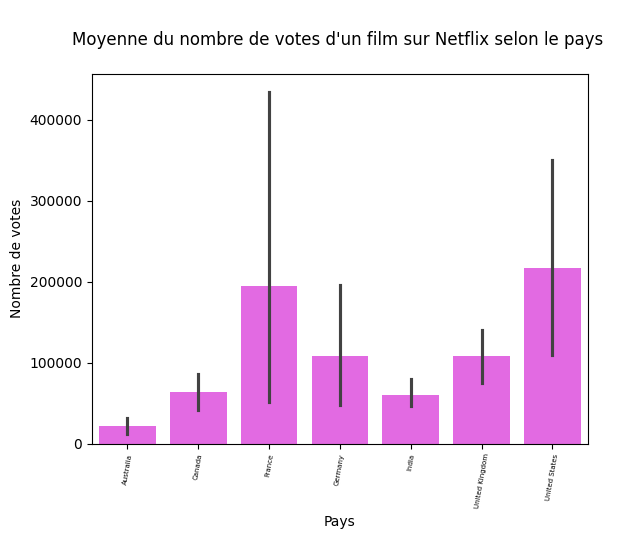

In [36]:
import pandas as pd 
import seaborn as sbn
import matplotlib.pyplot as plt

df_movies7 = df_movies.drop(columns=['company', 'director', 'budget', 'rating', 'released', 'runtime', 'score', 'star', 'writer', 'year'])
df_netflix_titles7 = df_netflix_titles.drop(columns=['type', 'director', 'cast', 'country', 'date_added', 
                                            'release_year', 'rating', 'duration', 'listed_in', 'description'])

#Vérifier et enlever les lignes qui n'ont pas de pays attribué
df_movies7['country'] = df_movies7['country'].fillna('ND')
df_movies7 = df_movies7.drop(df_movies7[df_movies7['country']== 'ND'].index)

#Joindre les deux DataFrames 
df_merged7 = df_movies7.join(df_netflix_titles7.set_index('title'), on='name')

#Ne garder que les lignes qui ont des valeurs contenues dans la colonne 'show_id' 
df_merged7['show_id'] = df_merged7['show_id'].fillna('ND')
df_merged7 = df_merged7.drop(df_merged7[df_merged7['show_id']== 'ND'].index)
df_merged7 = df_merged7.drop(columns=['show_id'])

#Ne garder que les lignes qui ont des valeurs contenues dans la colonne 'score'
df_merged7['votes'] = df_movies7['votes'].fillna('ND')
df_merged7 = df_merged7.drop(df_merged7[df_merged7['votes']== 'ND'].index)
df_merged7['gross'] = df_merged7['gross'].fillna('ND')
df_merged7 = df_merged7.drop(df_merged7[df_merged7['gross']== 'ND'].index)

#Exclure les pays qui n'ont pas assez de donnees 
counts = df_merged7['country'].value_counts()
print(counts)
for country in counts.index:  
    if counts[country] < 10:  
        df_merged7 = df_merged7[df_merged7['country'] != country] 

#Moyenne de la colonne 'votes'
df_merged_copy7 = df_merged7.groupby(['country', 'genre'])[['votes']].mean()

#Visualiser sur seaborn 
# hue = 'genre', on pourrait le rajouter mais la distribution des données n'est pas égale afin de formuler une conclusion précise et fiable 
sbn.barplot(x='country', 
            y='votes', 
            data=df_merged_copy7,
           color = '#f656f6',
            legend = False 
           )
plt.xticks(fontsize=5, rotation=80) 

plt.xlabel("Pays")
plt.title("\nMoyenne du nombre de votes d'un film sur Netflix selon le pays \n")
plt.ylabel("Nombre de votes")

# Sauvegarder le graphique en format pdf 
plt.savefig("Votes_vs_pays_barplot.pdf", format='pdf', bbox_inches='tight')

Les données montrent que la France et les États-Unis sont les deux pays qui enregistrent le plus de votes par film sur Netflix. 

<h2 style="color: aqua; font-weight:700;">PAYS VS REVENU </h2> 

country
United States           805
United Kingdom          117
India                    25
France                   24
Canada                   23
Germany                  21
Australia                12
Hong Kong                 8
Spain                     7
Ireland                   7
Japan                     7
China                     6
South Korea               5
Denmark                   4
New Zealand               4
Mexico                    3
Sweden                    3
Thailand                  3
South Africa              3
Italy                     3
Russia                    1
Finland                   1
Vietnam                   1
Czech Republic            1
United Arab Emirates      1
Taiwan                    1
Israel                    1
Iran                      1
Brazil                    1
Switzerland               1
Philippines               1
Name: count, dtype: int64


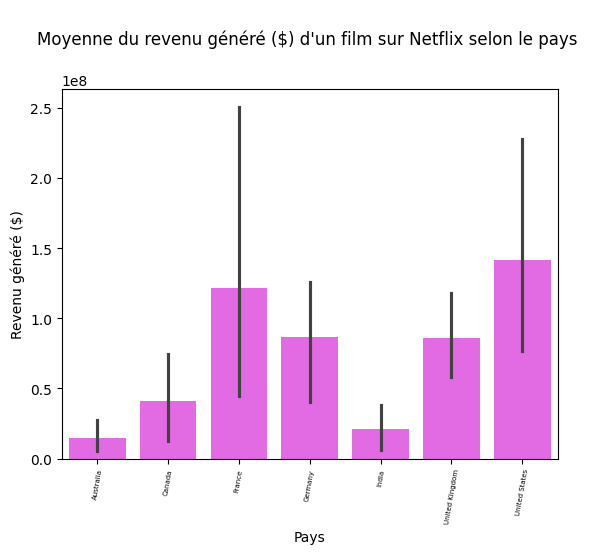

In [38]:
import pandas as pd 
import seaborn as sbn
import matplotlib.pyplot as plt

df_movies8 = df_movies.drop(columns=['company', 'director', 'budget', 'rating', 'released', 'runtime', 'score', 'star', 'writer', 'year'])
df_netflix_titles8 = df_netflix_titles.drop(columns=['type', 'director', 'cast', 'country', 'date_added', 
                                            'release_year', 'rating', 'duration', 'listed_in', 'description'])

#Vérifier et enlever les lignes qui n'ont pas de pays attribué
df_movies8['country'] = df_movies8['country'].fillna('ND')
df_movies8 = df_movies8.drop(df_movies8[df_movies8['country']== 'ND'].index)

#Joindre les deux DataFrames 
df_merged8 = df_movies8.join(df_netflix_titles8.set_index('title'), on='name')

#Ne garder que les lignes qui ont des valeurs contenues dans la colonne 'show_id' 
df_merged8['show_id'] = df_merged8['show_id'].fillna('ND')
df_merged8 = df_merged8.drop(df_merged8[df_merged8['show_id']== 'ND'].index)
df_merged8 = df_merged8.drop(columns=['show_id'])

#Ne garder que les lignes qui ont des valeurs contenues dans la colonne 'score'
df_merged8['votes'] = df_movies8['votes'].fillna('ND')
df_merged8 = df_merged8.drop(df_merged8[df_merged8['votes']== 'ND'].index)
df_merged8['gross'] = df_merged8['gross'].fillna('ND')
df_merged8 = df_merged8.drop(df_merged8[df_merged8['gross']== 'ND'].index)

#Exclure les pays qui n'ont pas assez de donnees 
counts = df_merged8['country'].value_counts()
print(counts)
for country in counts.index:  
    if counts[country] < 10:  
        df_merged8 = df_merged8[df_merged8['country'] != country] 

#Moyenne de la colonne 'votes'
df_merged_copy8 = df_merged8.groupby(['country', 'genre'])[['gross']].mean()

#Visualiser sur seaborn 
sbn.barplot(x='country', 
            y='gross', 
            data=df_merged_copy8, 
           color = '#f656f6', 
           legend = False)

plt.xticks(fontsize=5, rotation=80) 
plt.xlabel("Pays")
plt.title("\nMoyenne du revenu généré ($) d'un film sur Netflix selon le pays \n")
plt.ylabel("Revenu généré ($)")

# Sauvegarder le graphique en format pdf 
plt.savefig("Revenu_vs_pays_barplot.pdf", format='pdf', bbox_inches='tight')

Le graphique illustre que la France et les États-Unis sont les deux pays qui enregistrent le plus de revenu par film sur Netflix, ce qui va dans la même tendance qu'avec le nombre de votes générés par film sur Netflix. On peut en déduire que la France et les États-Unis sont les pays qui produisent les films les plus populaires. 

<h2 style="color: aqua; font-weight:700;">PAYS VS SCORE </h2> 

country
United States           805
United Kingdom          117
India                    25
France                   24
Canada                   23
Germany                  21
Australia                12
Hong Kong                 8
Spain                     7
Ireland                   7
Japan                     7
China                     6
South Korea               5
Denmark                   4
New Zealand               4
Mexico                    3
Sweden                    3
Thailand                  3
South Africa              3
Italy                     3
Russia                    1
Finland                   1
Vietnam                   1
Czech Republic            1
United Arab Emirates      1
Taiwan                    1
Israel                    1
Iran                      1
Brazil                    1
Switzerland               1
Philippines               1
Name: count, dtype: int64


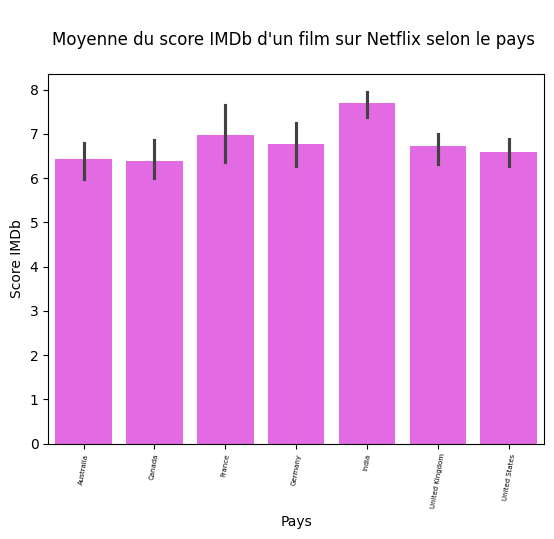

In [40]:
import pandas as pd 
import seaborn as sbn
import matplotlib.pyplot as plt

df_movies9 = df_movies.drop(columns=['company', 'director', 'budget', 'rating', 'released', 'runtime', 'star', 'writer', 'year'])
df_netflix_titles9 = df_netflix_titles.drop(columns=['type', 'director', 'cast', 'country', 'date_added', 
                                            'release_year', 'rating', 'duration', 'listed_in', 'description'])

#Vérifier et enlever les lignes qui n'ont pas de pays attribué
df_movies9['country'] = df_movies9['country'].fillna('ND')
df_movies9 = df_movies9.drop(df_movies9[df_movies9['country']== 'ND'].index)

#Joindre les deux DataFrames 
df_merged9 = df_movies9.join(df_netflix_titles9.set_index('title'), on='name')

#Ne garder que les lignes qui ont des valeurs contenues dans la colonne 'show_id' 
df_merged9['show_id'] = df_merged9['show_id'].fillna('ND')
df_merged9 = df_merged9.drop(df_merged9[df_merged9['show_id']== 'ND'].index)
df_merged9 = df_merged9.drop(columns=['show_id'])

#Ne garder que les lignes qui ont des valeurs contenues dans la colonne 'score'
df_merged9['votes'] = df_movies9['votes'].fillna('ND')
df_merged9 = df_merged9.drop(df_merged9[df_merged9['votes']== 'ND'].index)
df_merged9['gross'] = df_merged9['gross'].fillna('ND')
df_merged9 = df_merged9.drop(df_merged9[df_merged9['gross']== 'ND'].index)

#Exclure les pays qui n'ont pas assez de donnees 
counts = df_merged9['country'].value_counts()
print(counts)
for country in counts.index:  
    if counts[country] < 10:  
        df_merged9 = df_merged9[df_merged9['country'] != country] 

#Moyenne de la colonne 'votes'
df_merged_copy9 = df_merged9.groupby(['country', 'genre'])[['score']].mean()

#Visualiser sur seaborn 
sbn.barplot(x='country', 
            y='score', 
            data=df_merged_copy9, 
           color = '#f656f6', 
           legend = False )
plt.xticks(fontsize=5, rotation=80) 
plt.xticks(fontsize=5, rotation=80) 
plt.xlabel("Pays")
plt.title("\nMoyenne du score IMDb d'un film sur Netflix selon le pays \n")
plt.ylabel("Score IMDb")

# Sauvegarder le graphique en format pdf 
plt.savefig("IMDb_vs_pays_barplot.pdf", format='pdf', bbox_inches='tight')

Le graphique illustre que l'Inde, suivi de la France, enregistrent un score IMDb plus élevé par film sur Netflix. Ce graphique ne suit pas la même tendance que les deux derniers (Pays vs Revenu et Pays vs Nombre de votes). Ainsi, on peut en conclure que la popularité quantitative d'un film ne correspond pas à la popularité qualitative. Un film peut être visionné par des millions de personnes mais pas nécessairement apprécié par tous. 

 <h1 style="color: orange; font-weight:700; text-decoration: underline;">SUJET #3 : Quel est le genre le plus populaire sur Netflix, et quels films de ce genre, absents de la plateforme, pourraient être intéressants à envisager ?</h1>  


<h2 style="color: aqua; font-weight:700;">Analyse des genres présents sur Netflix </h2> 

Il y a 1173 valeurs nulles sur 9957!


,Nombre de fois où rating est null,Nombre de films
genre,,
Action,12,33
"Action, Adventure",1,3
"Action, Adventure, Comedy",8,89
"Action, Adventure, Crime",5,47
"Action, Adventure, Drama",26,154
...,...,...
"Short, Reality-TV",1,1
Sport,2,6
Talk-Show,16,28


,Score IMDB moyen,Nombre d'occurence
genre,,
History,7.267066,334
Animation,7.171563,1280
Adventure,7.073453,1390
News,7.068421,19
Talk-Show,7.068421,38
Documentary,7.020477,1216
Game-Show,6.968000,75
Film-Noir,6.966667,12
Biography,6.965588,340


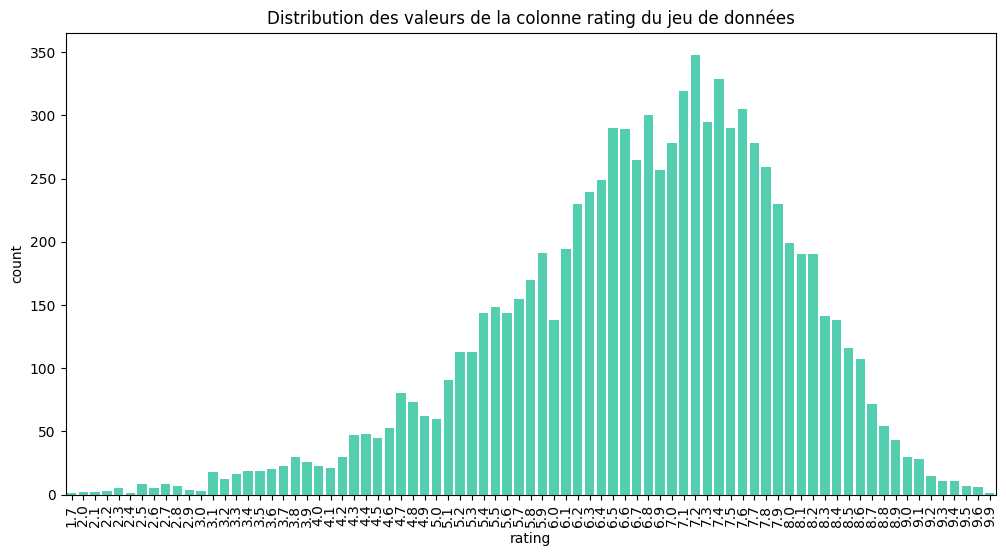

In [80]:
import pandas
import seaborn
import matplotlib.pyplot as plt
# Nettoyage du dataframe "df_netflix_pop_title"
# L'organisation actuelle du dataframe attribue un ou plusieurs genres à chaque film. L'objectif est de diviser chaque ligne en autant de lignes qu'il y 
# a de genres associés à ce film, afin de faciliter les analyses ultérieures et de les rendre plus significatives. Cependant, cette méthode présente 
# une limite, car elle ne permet pas de connaître la contribution exacte de chaque genre dans le score du film (on met le même score pour chaque genre 
# d'un même film). Il aurait été pertinent de pousser l'analyse plus loin en identifiant quantitativement le poids de chaque genre, afin de pouvoir 
# pondérer les résultats de manière plus précise.

# Définition d'une fonction pour transformer des valeurs en chaîne de caractère.
def to_string(x):
    return str(x)

# Définition d'une fonction pour insérer les genres d'un film dans une liste.
def split_genre(x):
    return x.split(", ")

# Application des fonctions sur la colonne "genre".
df_netflix_title_copy = df_netflix_pop_title.copy()
df_netflix_title_copy["genre"] = df_netflix_title_copy["genre"].apply(to_string).apply(split_genre)

# Utilisation de la fonction "explode" de pandas pour séparer les éléments d'une liste contenue dans une colonne en lignes distinctes. Les valeurs des 
# autres colonnes du DataFrame sont dupliquées pour chaque nouvelle ligne générée.
df_exploded = df_netflix_title_copy.explode("genre")

# Les lignes de code suivantes en commentaire nous ont permis d'identifier les films dont le genre est nul. Étant donné qu'il y a 73 lignes avec une 
# valeur nulle pour le genre sur 9957, et que, d'après les titres et descriptions (lorsqu'elles sont présentes), les genres de films estimés varient 
# considérablement, nous pouvons conclure que l'absence de genre n'est pas biaisée. Nous allons donc supprimer ces lignes du jeu de données.

#pandas.set_option("display.max_rows", None)
#display(df_exploded[df_exploded["genre"] == "nan"])

# Filtrage pour enlever les valeurs nulles de la colonne "genre" du dataframe résultant.
df_exploded = df_exploded[df_exploded["genre"] != "nan"]

# On voudra maintenant trouver le rating moyen par genre. Mais avant de procéder aux calculs sur la colonne "rating", nous examinerons la distribution 
# de ses valeurs afin de nous assurer qu'aucune anomalie ne risque de fausser les résultats.
# Création d'un histogramme pour représenter la distribution de la variable "rating" dans le jeu de données
graph_histo_netflix = seaborn.countplot(x="rating", color = '#40e2bb', data=df_netflix_title_copy)
graph_histo_netflix.set(title="Distribution des valeurs de la colonne rating du jeu de données")
graph_histo_netflix.figure.set_size_inches(12, 6)     # Étirement du graphique pour qu'il soit plus visible
for item in graph_histo_netflix.get_xticklabels():
        item.set_rotation(90)                          # Rotation des étiquettes de l'axe des x (90 degrés)

# Sauvegarder le graphique en format pdf 
plt.savefig("Histogramme_netflix_sujet3.pdf", format='pdf', bbox_inches='tight')

# La distribution semble n'avoir aucun problème. Les valeurs sont bien entre 0 et 10 et aucune anormalité n'est présente.

# Maintenant, vérifions s'il y a des valeurs manquantes dans la colonne "rating".
df_netflix_title_null = df_netflix_title_copy[df_netflix_title_copy["rating"].isnull()]

# On compte le nombre d'occurrences en utilisant l'index, afin de s'assurer que chaque ligne est bien prise en compte. Si je prends une autre colonne, 
# il se peut que des valeurs manquantes y figurent, et elles ne seraient alors pas comptabilisées.
df_netflix_title_null = df_netflix_title_null.reset_index()
df_netflix_title_copy_index = df_netflix_title_copy.reset_index()
print(f"Il y a {df_netflix_title_null["index"].count()} valeurs nulles sur {df_netflix_title_copy_index["index"].count()}!")
# Il y a 1 173 valeurs nulles sur 9957

# Nous allons maintenant compter les valeurs nulles par genre afin de nous assurer qu'elles ne sont pas biaisées et qu'elles sont réparties de 
# manière aléatoire entre les genres.
# pandas.set_option("display.max_rows", None) # Pour mieux voir toutes les lignes tu tableau résultant.
# Table avec nombre de fois où rating est null par genre.
df_netflix_title_null_count = df_netflix_pop_title[df_netflix_pop_title["rating"].isnull()].reset_index().groupby("genre")[["index"]].count()
df_netflix_title_null_count.columns = ["Nombre de fois où rating est null"]

# Table avec nombre de films par genre.
df_netflix_title_genre_count = df_netflix_pop_title.reset_index().groupby("genre")[["index"]].count()
df_netflix_title_genre_count.columns = ["Nombre de films"]

# Jointure des deux Dataframes précédents.
df_join_null_genre = df_netflix_title_null_count.join(df_netflix_title_genre_count)
display(df_join_null_genre)
# Le tableau résultant montre le nombre de films pour chaque genre et, parmi eux, combien ont une valeur nulle dans la colonne "rating". On observe que 
# ces valeurs nulles sont réparties de manière relativement uniforme entre plusieurs genres, ce qui suggère l'absence de biais. De plus, les valeurs 
# nulles représentent généralement une petite fraction du total des films par genre, renforçant ainsi la validité des résultats qui suivront.

# Pour la suite, les valeurs nulles n'ont pas été supprimées du DataFrame, car les fonctions d'agrégation, comme la moyenne, les ignorent 
# automatiquement.

# Calcul de la moyenne des scores IMDB par genre pour les films disponibles sur Netflix, et affichage des 10 genres les plus populaires.
df_netflix_title_genre_mean = df_exploded.groupby("genre")[["rating"]].mean().nlargest(10, "rating")
df_netflix_title_genre_mean.columns = ["Score IMDB moyen"]

# Nous allons ajouter à ce dataframe le nombre d'occurrences de chaque genre dans le dataframe d'origine, afin d'évaluer si la moyenne est significative 
# (le nombre d'occurrences doit être suffisamment élevé).
df_netflix_title_genre_count_2 = df_exploded.groupby("genre")[["rating"]].count()
df_netflix_title_genre_count_2.columns = ["Nombre d'occurence"]
df_join = df_netflix_title_genre_mean.join(df_netflix_title_genre_count_2)
display(df_join)
# Le nombre d'occurence est assez grand pour chaque genre. Les moyennes du score IMDB sont donc significatives.

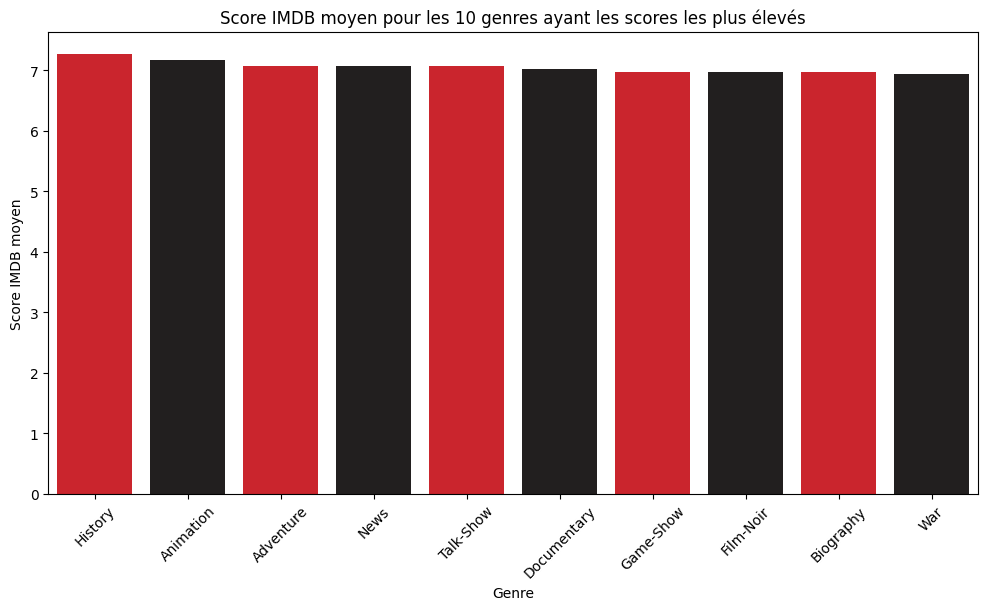

In [46]:
# Création d'un diagramme à barres représentant le score IMDB moyen pour les 10 genres ayant les scores les plus élevés.
netflix_palette = ["#E50914", "#221f1f", "#E50914", "#221f1f", "#E50914", "#221f1f", "#E50914", "#221f1f", "#E50914", "#221f1f"]
graph_barres = seaborn.barplot(x="genre", y="Score IMDB moyen", data=df_netflix_title_genre_mean, hue="genre", palette=netflix_palette)
graph_barres.set(xlabel="Genre", title="Score IMDB moyen pour les 10 genres ayant les scores les plus élevés")
graph_barres.figure.set_size_inches(12, 6)    # Étirement du graphique pour qu'il soit plus visible
for item in graph_barres.get_xticklabels():
        item.set_rotation(45)                 # Rotation des étiquettes de l'axe des x (45 degrés)

# Sauvegarder le graphique en format pdf 
plt.savefig("IMDbmoyen_top10genres_sujet3.pdf", format='pdf', bbox_inches='tight')

<h2 style="color: aqua; font-weight:700;"> Analyse du top 10 des films du genre "History", indépendamment de la plateforme. </h2>


Top 10 des films associés au genre Histoire selon leur score IMDB.



,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4
7,Schindler's List,1993,A,195 min,History,8.9,94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall
18,Hamilton,2020,PG-13,160 min,History,8.6,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry
54,Ayla: The Daughter of War,2017,NaN,125 min,History,8.4,NaN,Can Ulkay,Erdem Can,Çetin Tekindor,Ismail Hacioglu,Kyung-jin Lee
102,Braveheart,1995,A,178 min,History,8.3,68.0,Mel Gibson,Mel Gibson,Sophie Marceau,Patrick McGoohan,Angus Macfadyen
107,Amadeus,1984,R,160 min,History,8.3,88.0,Milos Forman,F. Murray Abraham,Tom Hulce,Elizabeth Berridge,Roy Dotrice
157,Der Untergang,2004,R,156 min,History,8.2,82.0,Oliver Hirschbiegel,Bruno Ganz,Alexandra Maria Lara,Ulrich Matthes,Juliane Köhler
176,The Message,1976,PG,177 min,History,8.2,NaN,Moustapha Akkad,Anthony Quinn,Irene Papas,Michael Ansara,Johnny Sekka
179,The Great Escape,1963,U,172 min,History,8.2,86.0,John Sturges,Steve McQueen,James Garner,Richard Attenborough,Charles Bronson
185,Det sjunde inseglet,1957,A,96 min,History,8.2,88.0,Ingmar Bergman,Max von Sydow,Gunnar Björnstrand,Bengt Ekerot,Nils Poppe
317,La passion de Jeanne d'Arc,1928,Passed,110 min,History,8.1,NaN,Carl Theodor Dreyer,Maria Falconetti,Eugene Silvain,André Berley,Maurice Schutz




Nous essayons ici de trouver les titres du top 10 dans le jeu de données des films Netflix en utilisant la distance de Jaccard.

Titre : The F**k-It List | Distance : 0.75
Titre : Cobra Kai | Distance : 1.0
Titre : Munich: The Edge of War | Distance : 0.5714285714285714
Titre : Cobra Kai | Distance : 1.0
Titre : Cobra Kai | Distance : 1.0
Titre : Der Wixxer | Distance : 0.6666666666666666
Titre : The Crown | Distance : 0.6666666666666666
Titre : The Great Gatsby | Distance : 0.5
Titre : Det som göms i snö | Distance : 0.8571428571428571
Titre : La chica de nieve | Distance : 0.7142857142857143

On remarque qu'aucun titre de la liste ci-dessus ne correspond au top 10 affiché dans le DataFrame précédent, ce qui signifie qu'aucun des             titres du top 10 ne se trouve sur Netflix.



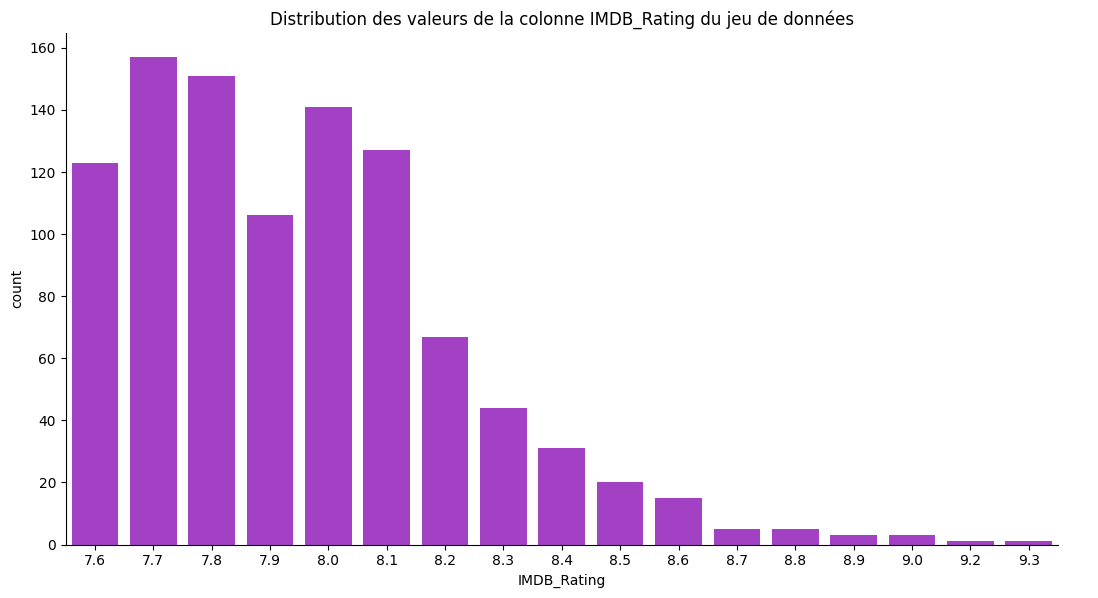

In [82]:
import pandas
import seaborn
from nltk.metrics.distance import jaccard_distance

# Nettoyage du dataframe "df_top1000_imdb" (les analyses seront presque identiques à celles effectuées sur le précédent dataframe, car ils sont très 
# similaires. La différence réside dans le fait que ce dataframe contient les 1000 films les plus populaires en général selon le score IMDB, tandis 
# que le premier dataframe se concentrait uniquement sur les films disponibles sur Netflix).

# Création d'un histogramme pour représenter la distribution de la variable "rating" dans le jeu de données.
graph_histo_top1000 = seaborn.catplot(kind="count", x="IMDB_Rating", color = '#ad2bda', data=df_top1000_imdb)
graph_histo_top1000.set(title="Distribution des valeurs de la colonne IMDB_Rating du jeu de données")
graph_histo_top1000.figure.set_size_inches(12, 6) # Étirement du graphique pour qu'il soit plus visible
for item in graph_barres.get_xticklabels():
        item.set_rotation(90)                     # Rotation des étiquettes de l'axe des x (90 degrés)
# La distribution du score IMDB dans ce jeu de données est similaire à celle du précédent, mais elle est tronquée au centre. Cela est cohérent,
# car ce jeu de données inclut uniquement les films ayant les meilleurs scores IMDB. Aucune donnée aberrante ou anomalie ne semble être présente
# dans cette colonne du jeu de données.


# Nous souhaitons maintenant analyser uniquement les films associés au genre "Histoire". Pour ce faire, nous définissons la fonction suivante afin de 
# modifier la colonne "Genre" du jeu de données.
def find_History(x):
    if "History" in x:            # "x" recevra des listes en argument lors de l'application de la fonction au DataFrame, car nous aurons préalablement 
        return "History"          # appliqué la fonction "split_genre" à la même colonne (fonction que nous avons précédemment définie).
    else:
        return -1

df_top1000_imdb["Genre"] = df_top1000_imdb["Genre"].apply(split_genre).apply(find_History)
df_top1000_imdb = df_top1000_imdb[df_top1000_imdb["Genre"] == "History"] # On filtre pour seulement avoir les enregistrements dont le genre est "History"

# Nous affichons ensuite le top 10 des films associés au genre Histoire selon leur score IMDB.
df_top1000_imdb = df_top1000_imdb.sort_values(by=["IMDB_Rating"], ascending=False).head(10).drop(columns=["Poster_Link", "Overview", "No_of_Votes", \
                                                "Gross"])
print("\nTop 10 des films associés au genre Histoire selon leur score IMDB.\n")
display(df_top1000_imdb)

# Nous vérifions ensuite si ces films sont disponibles sur Netflix à partir du premier DataFrame analysé précédemment.


# Le code suivant compare chaque film du top 10 précédent avec chaque film sur Netflix et calcule la distance de Jaccard à chaque fois. Cette distance 
# est ensuite stockée dans un dictionnaire, afin de sélectionner le titre Netflix ayant la distance de Jaccard la plus basse par la suite.

print("\n")
print("Nous essayons ici de trouver les titres du top 10 dans le jeu de données des films Netflix en utilisant la distance de Jaccard.\n")

for titre1 in df_top1000_imdb["Series_Title"].values:

    dict_jaccard_dist = {}

    titre1_set = set(titre1.split())
    
    for titre2 in df_netflix_pop_title["title"].values:
            
        titre2_set = set(titre2.split())
            
        x = jaccard_distance(titre1_set, titre2_set)
        
        dict_jaccard_dist[titre2] = x
        
        minimum = min(dict_jaccard_dist, key=dict_jaccard_dist.__getitem__)
        
    print(f"Titre : {minimum} | Distance : {dict_jaccard_dist[minimum]}")

print("\nOn remarque qu'aucun titre de la liste ci-dessus ne correspond au top 10 affiché dans le DataFrame précédent, ce qui signifie qu'aucun des \
            titres du top 10 ne se trouve sur Netflix.\n")

# On constate qu'aucun des 10 films les mieux notés du genre histoire selon le score IMDB ne figure sur la plateforme Netflix. Bien que nous 
# reconnaissions la difficulté potentielle d'acquérir ces titres en raison de la forte concurrence, ils représentent des suggestions pertinentes, car 
# ils ont un fort potentiel pour séduire l’audience de Netflix. Si la concurrence peut être surmontée, leur acquisition pourrait s'avérer bénéfique.

 <h1 style="color: orange; font-weight:700; text-decoration: underline;"> SUJET #4 : Quels genres sont les plus populaires et à quels moments ? </h1>  

<h2 style="color: aqua; font-weight:700;"> Top 10 genres les plus populaires en diagramme en secteurs </h2>

Text(0.5, 1.0, 'Top 10 genres les plus populaires')

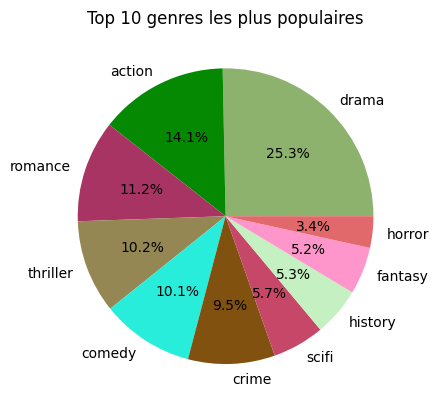

In [66]:
import pandas
import seaborn as sns 
import matplotlib.pyplot as plt

#'show_title' en 'title' pour une correspondance avec un autre jeu de données
df_top10_global = df_top10_global.rename(columns={'show_title':'title'})

# Suppression des espaces superflus autour des titres pour éviter les problèmes de correspondance
df_titlescsv['title']=df_titlescsv['title'].str.strip()
# Extraction uniquement des colonnes 'title' et 'genres' pour un traitement ultérieur
genre_title = df_titlescsv[['title','genres']]

# Fusion des deux ensembles de données sur la colonne 'title', pour ne conserver que les lignes correspondantes
filtered_data = df_top10_global.merge(genre_title, on='title', how='inner')

# Nettoyage de la colonne 'genres' qui etait de type 'str' en une liste expl : input :'['action', 'thriller']' => output = ['action',thriller']
filtered_data['genres'] = filtered_data['genres'].str.strip("[]").str.replace("'","").str.split(",")

# Transformation de la colonne 'genres' pour avoir une ligne par genre (explosion de liste)
filtered_data =filtered_data.explode('genres')
# Suppression des espaces autour des genres après l'explosion
filtered_data['genres'] = filtered_data['genres'].str.strip()

# Groupement des données par genre et sommation des vues hebdomadaires pour chaque genre
popular_genre=filtered_data.groupby('genres')[['weekly_views']].sum()
# Tri des genres par vues hebdomadaires, du plus populaire au moins populaire
popular_genre = popular_genre.sort_values(by='weekly_views', ascending=False)

# Sélection des 10 genres les plus populaires
top10_genres = popular_genre.iloc[:-9]

colors = ['#8cb26e', '#058802', '#a73462', '#948754', '#29eddb', '#81510f', '#c74768', '#c5f0c1', '#ff96cb', '#e1696b']
# Création d'un diagramme en secteurs (pie chart) pour les 10 genres les plus populaires
plt.pie(top10_genres['weekly_views'], colors=colors, labels=top10_genres.index,autopct='%1.1f%%')
plt.title("Top 10 genres les plus populaires")

<h2 style="color: aqua; font-weight:700;"> Genres les plus populaires en termes de visionnements par mois </h2>

In [68]:
#most watched genres per month on average : facultatif 

# Convertir la colonne 'week' en format datetime pour faciliter la manipulation des données temporelles
filtered_data['week']=pandas.to_datetime(filtered_data['week'])

# Extraire le mois à partir de la colonne 'week' et créer une nouvelle colonne 'month'
filtered_data['month'] = filtered_data['week'].dt.month

# Filtrer le dataset pour ne garder que les lignes où les 'genres' appartiennent aux 10 genres les plus populaires
top10_only = filtered_data[filtered_data['genres'].isin(top10_genres.index)]

# Grouper les données filtrées par mois ('month') et par genre ('genres'),
# puis calculer la moyenne des vues hebdomadaires ('weekly_views') pour chaque genre et chaque mois
weekly_views = top10_only.groupby(['month','genres'])[['weekly_views']].mean().reset_index()

# Trouver la valeur maximale des vues hebdomadaires moyennes pour chaque mois
top_views = weekly_views.groupby('month')[['weekly_views']].max()

# Faire une jointure (merge) entre les données 'weekly_views' et 'top_views' pour identifier
# les genres correspondant à la vue hebdomadaire maximale pour chaque mois
merge = weekly_views.merge(top_views, on=['month','weekly_views'])
print(merge)

    month    genres  weekly_views
0       1   romance  3.000000e+06
1       2  thriller  6.550000e+06
2       3    comedy  8.271429e+06
3       4    action  3.625000e+06
4       4     crime  3.625000e+06
5       5   history  1.162500e+07
6       6     crime  7.320000e+06
7       7   fantasy  5.581818e+06
8       7    horror  5.581818e+06
9       8    comedy  4.495000e+06
10      9   romance  5.890909e+06
11     10    action  6.459091e+06
12     11   history  9.950000e+06
13     12   history  4.300000e+06


<h2 style="color: aqua; font-weight:700;"> Nombre d'heures visionnées par semaine </h2>

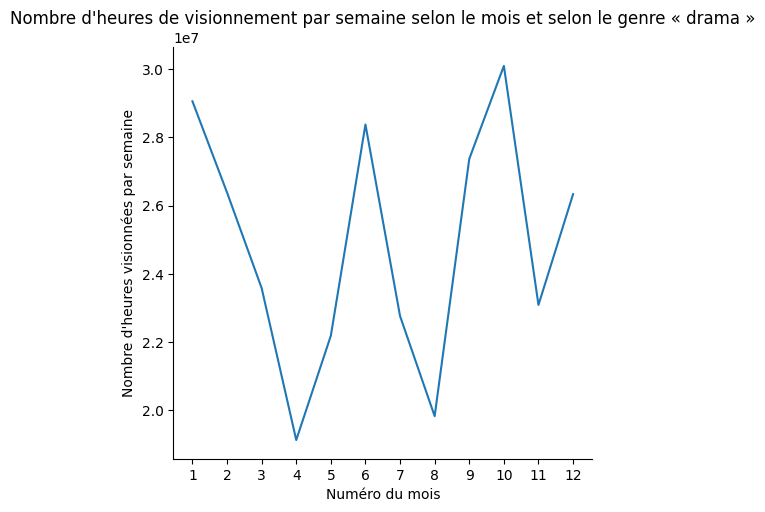

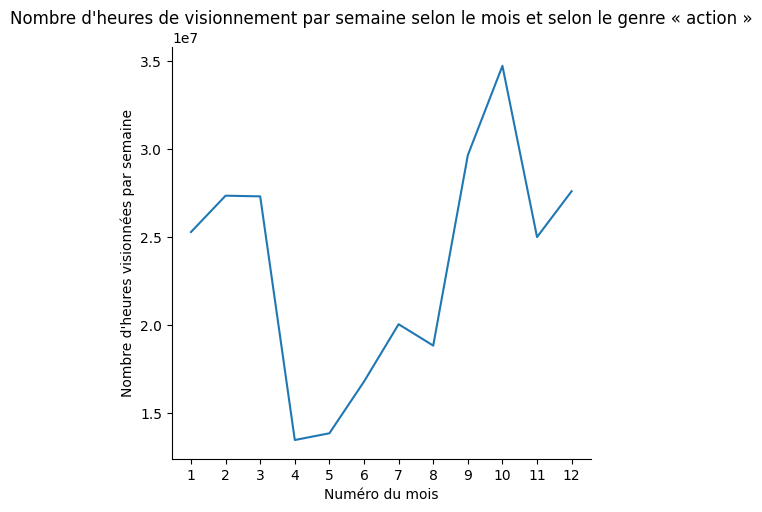

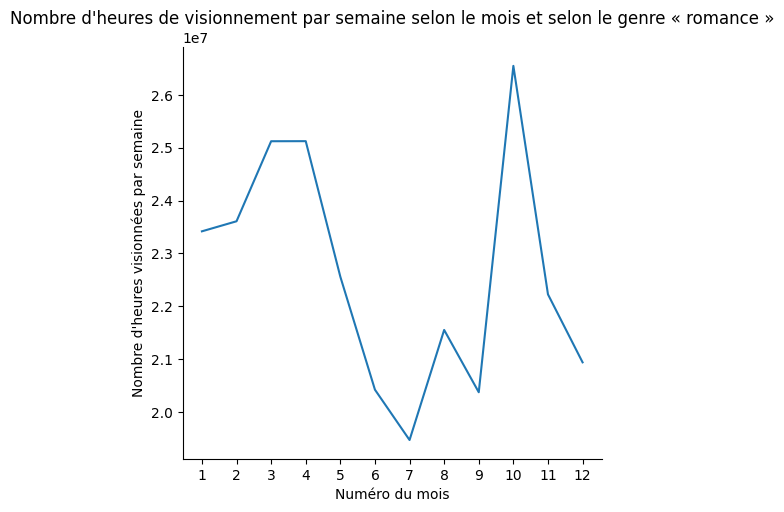

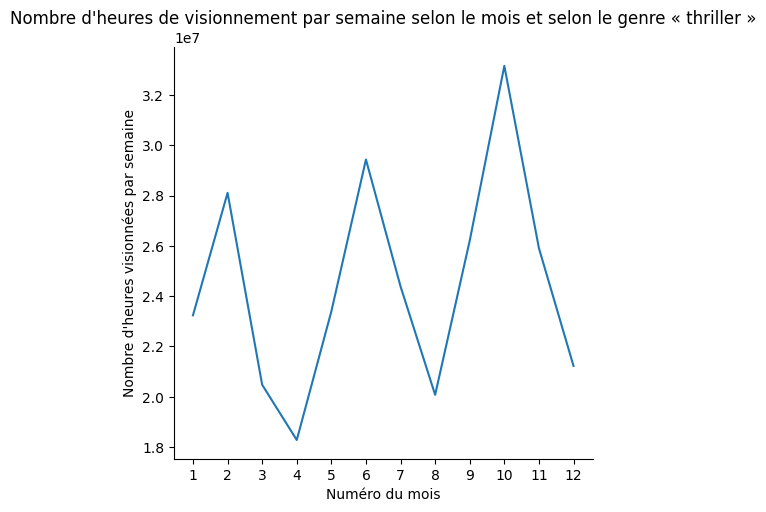

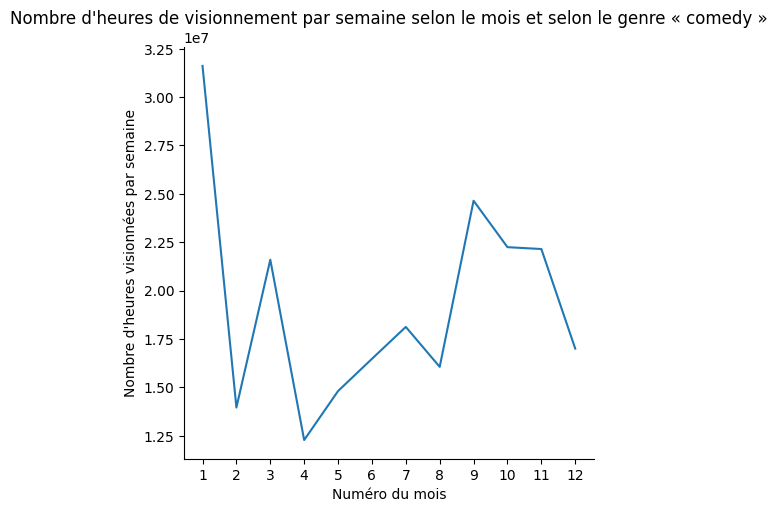

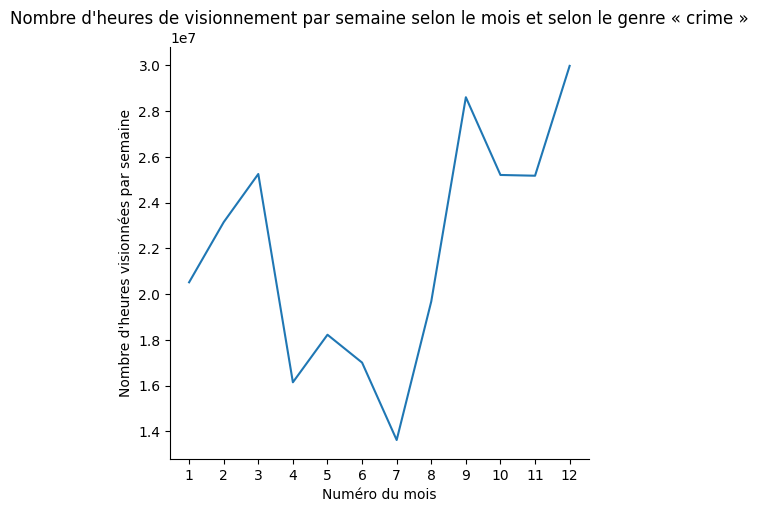

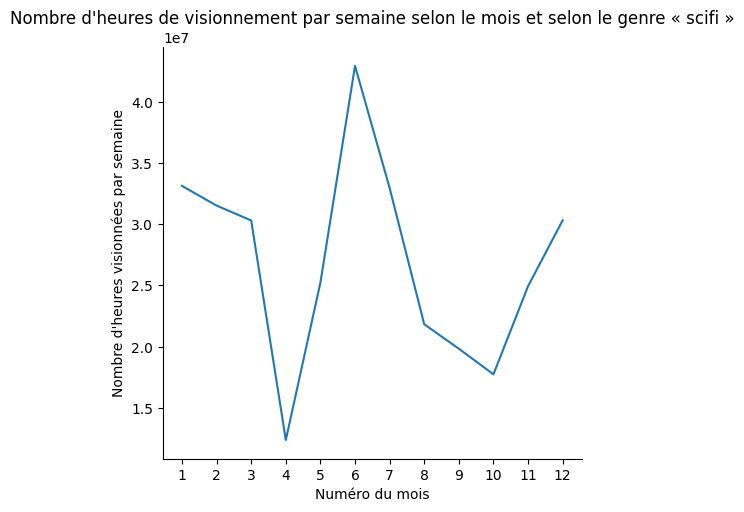

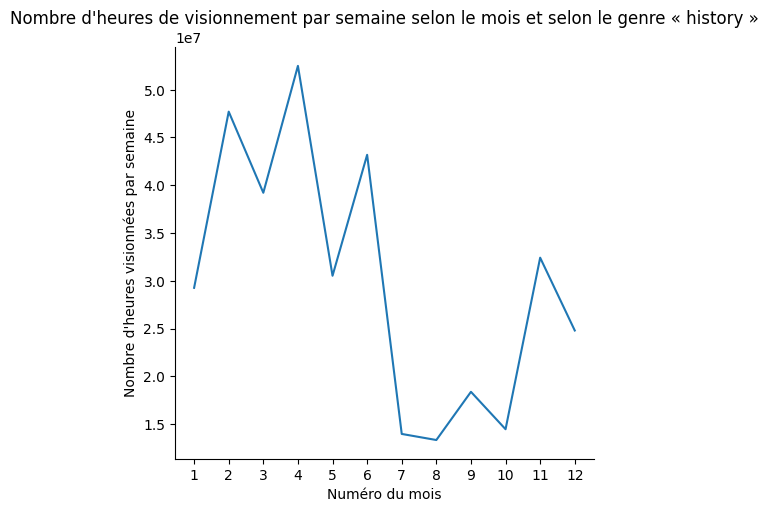

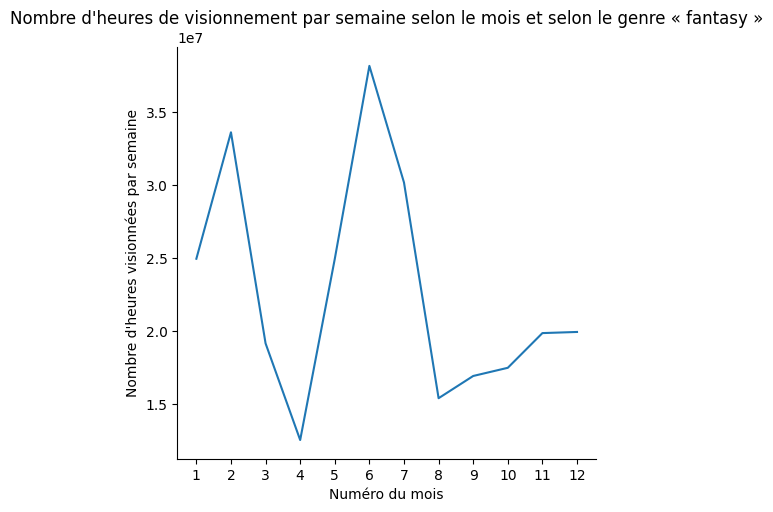

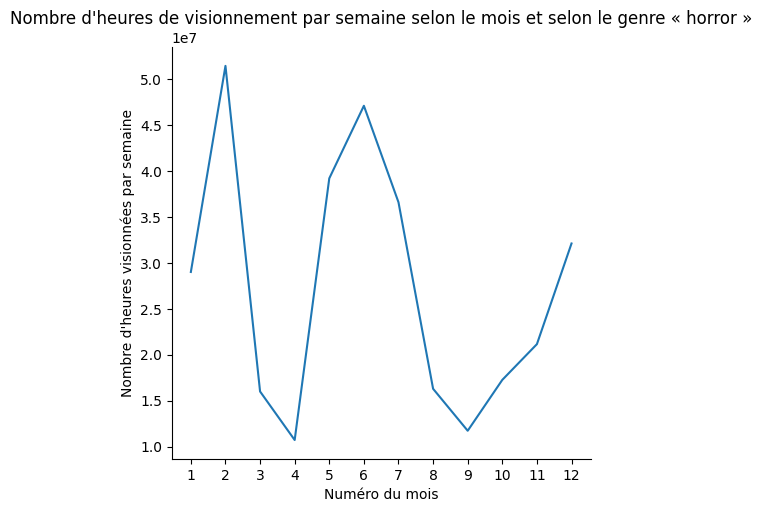

In [70]:
# Boucle à travers chaque genre parmi les 10 genres les plus populaires
import seaborn 

for index in top10_genres.index:
    # Filtrer les données pour ne garder que les lignes correspondant au genre actuel de la boucle
    test = filtered_data.loc[filtered_data['genres'] == index]
    
    # Grouper les données filtrées par mois et calculer la moyenne des heures vues hebdomadaires pour chaque mois
    test_1 = test.groupby('month')[['weekly_hours_viewed']].mean()
    
    # Créer un graphique de ligne avec seaborn pour visualiser la tendance mensuelle des heures vues pour ce genre
    seaborn.relplot(kind='line', data=test_1, legend = False)
    
    # Configurer les étiquettes de l'axe des abscisses pour afficher les mois de 1 à 12
    plt.xticks(ticks=range(1, 13))
    
    # Ajouter un titre au graphique indiquant le genre actuel
    plt.title(f"Nombre d'heures de visionnement par semaine selon le mois et selon le genre « {index} »")
    plt.ylabel("Nombre d'heures visionnées par semaine")
    plt.xlabel("Numéro du mois")

<h2 style="color: aqua; font-weight:700;"> Nombre d'heures visionnées par semaine (plus précis) </h2>

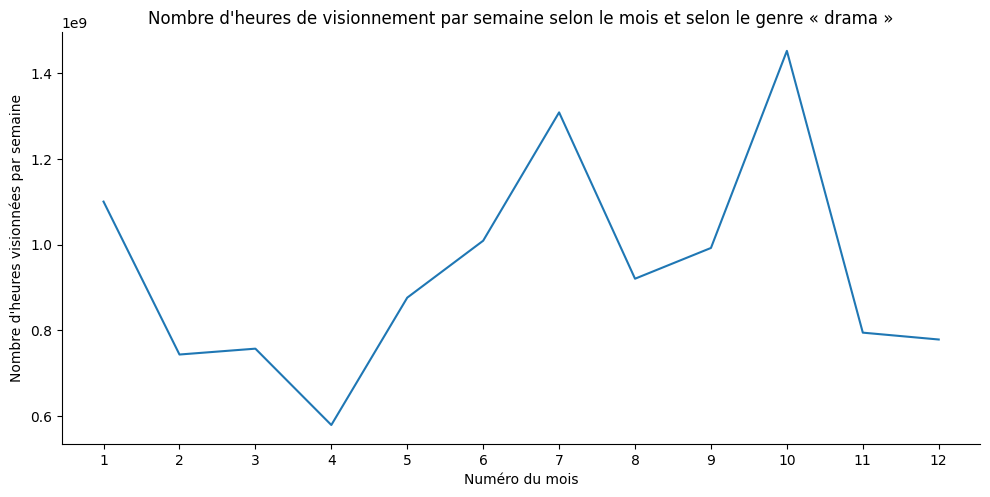

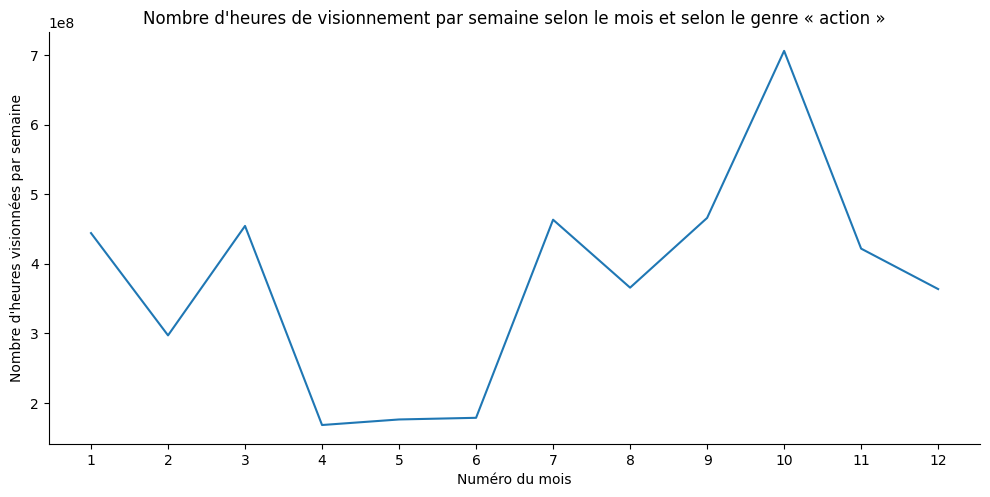

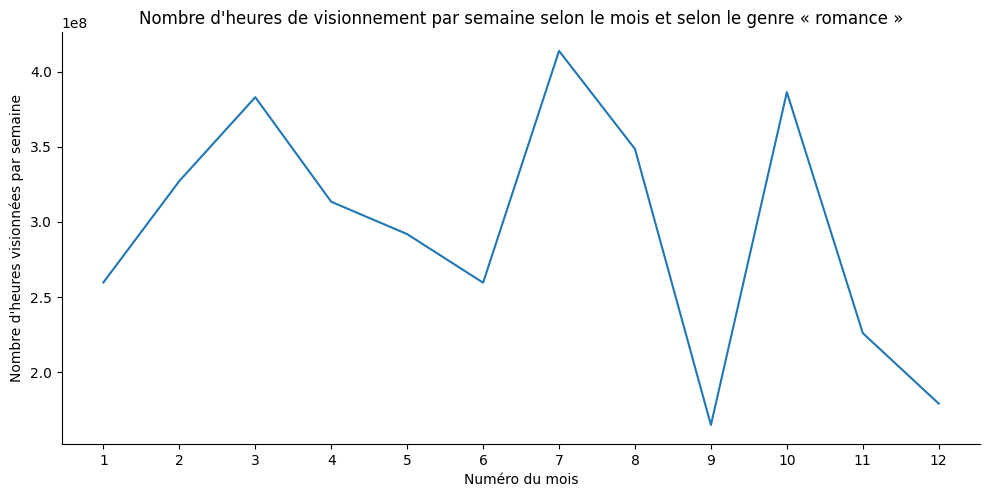

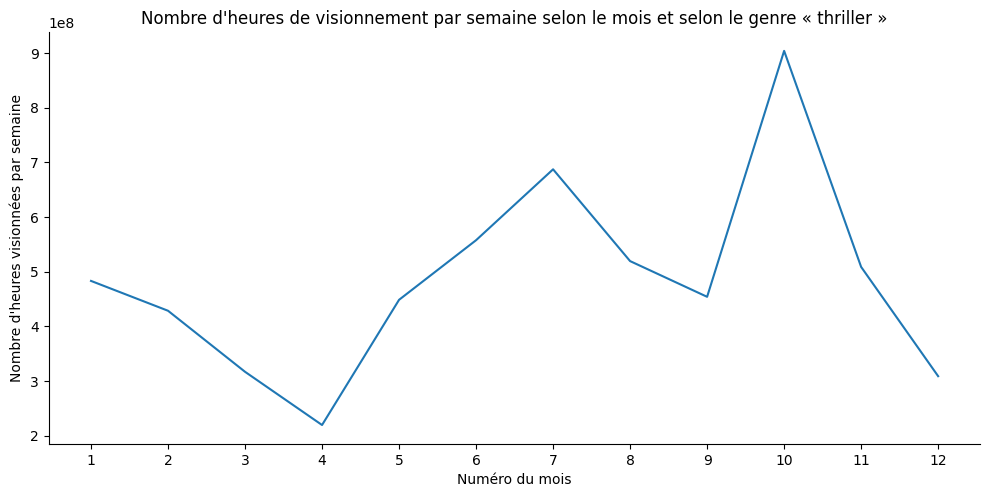

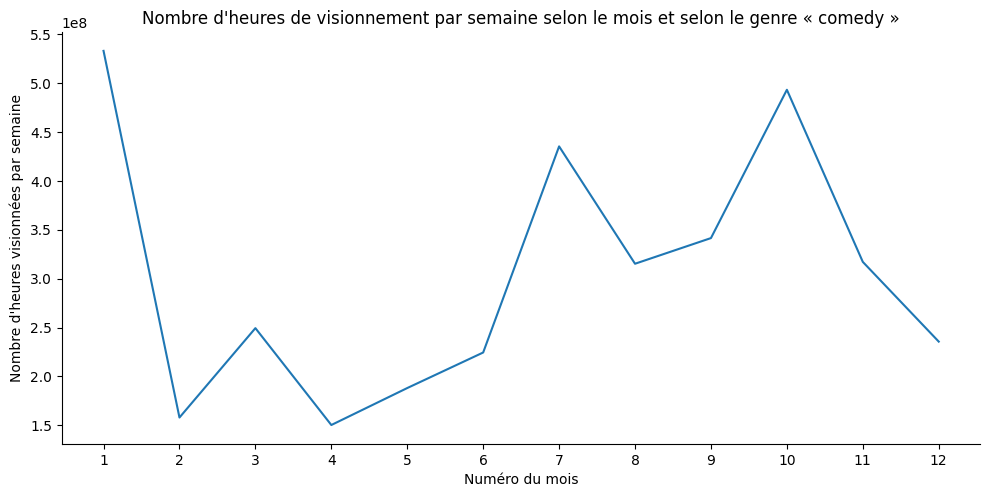

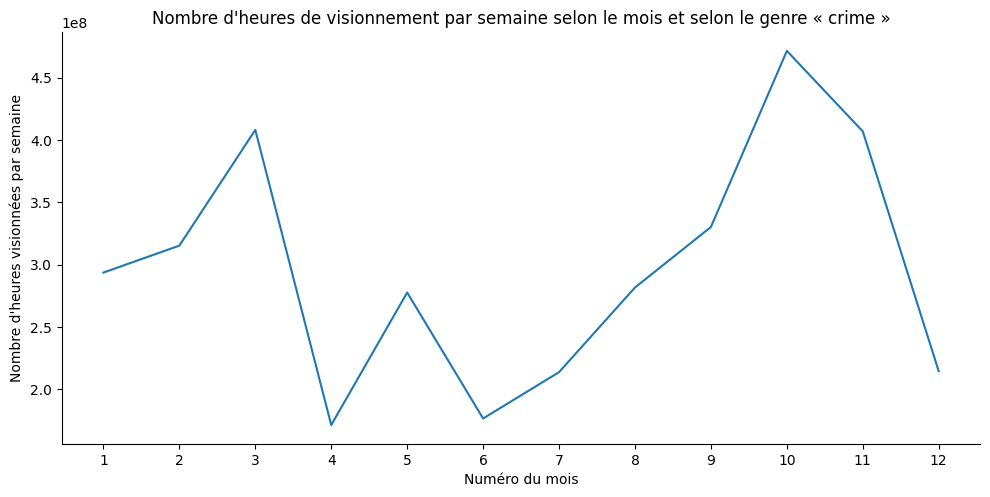

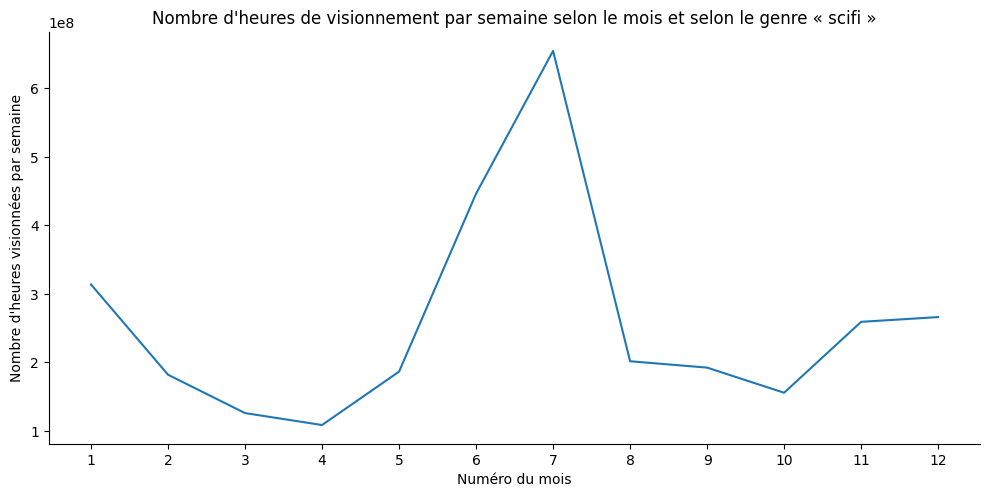

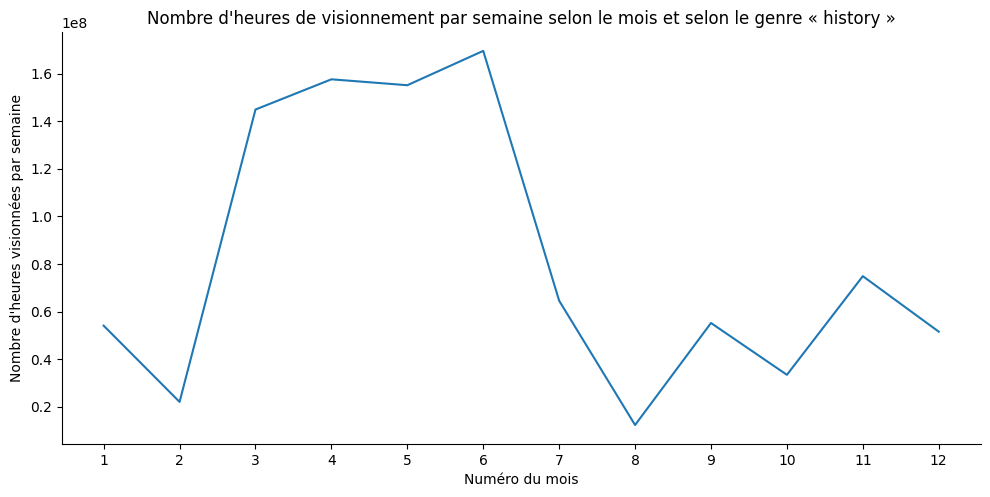

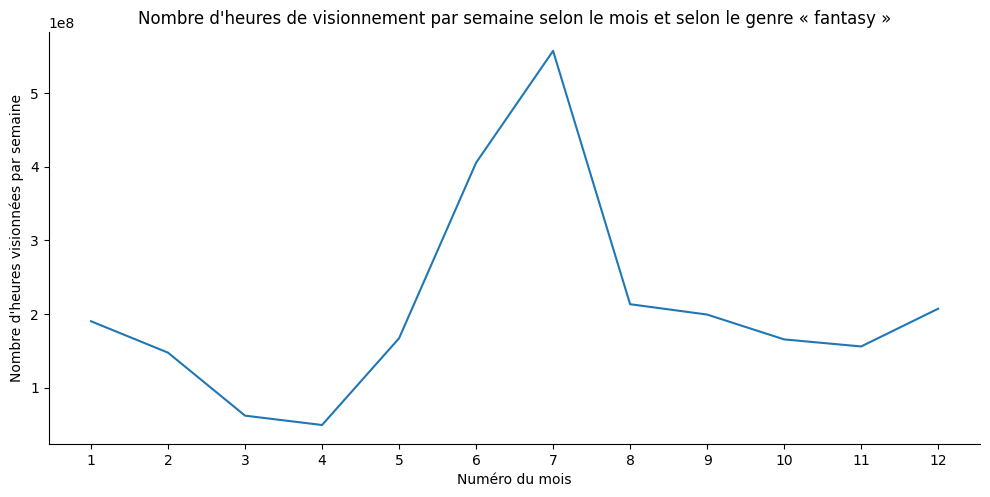

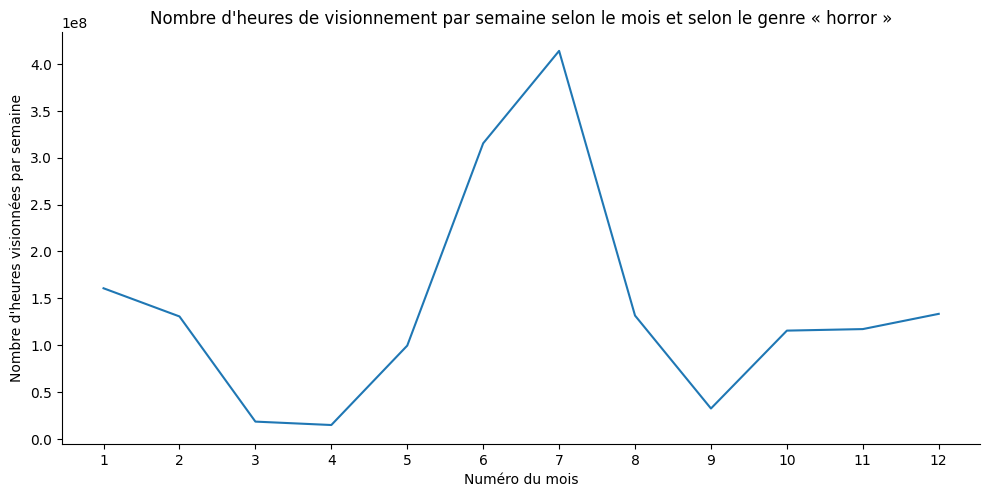

In [72]:
# Convertir la colonne 'week' en datetime pour manipuler les dates
filtered_data['week'] = pandas.to_datetime(filtered_data['week'])

# Extraire le mois et ajouter une colonne 'month'
filtered_data['month'] = filtered_data['week'].dt.month

# Grouper les données par 'month' et 'genres', puis sommer les vues hebdomadaires
monthly_views = (
    filtered_data.groupby(['month', 'genres'])[['weekly_hours_viewed']]
    .sum()  # Somme totale des vues hebdomadaires pour chaque mois
    .reset_index()
)

# Ajouter une estimation du nombre de semaines par mois pour calculer les moyennes mensuelles
# Environ 4.33 semaines par mois
monthly_views['average_monthly_views'] = monthly_views['weekly_hours_viewed'] / 4.33

# Visualisation avec Seaborn pour chaque genre dans le top 10
for index in top10_genres.index:
    # Filtrer pour un genre spécifique
    test = monthly_views.loc[monthly_views['genres'] == index]
    
    # Créer un graphique de lignes montrant la tendance mensuelle
    seaborn.relplot(
        kind='line',
        data=test,
        x='month',
        y='average_monthly_views',
        height=5,  # Hauteur du graphique
        aspect=2   # Ratio de largeur/hauteur
    )
    
    # Configurer les étiquettes de l'axe des abscisses pour afficher les mois
    plt.xticks(ticks=range(1, 13))  # Mois de 1 à 12
    plt.title(f"Nombre d'heures de visionnement par semaine selon le mois et selon le genre « {index} »")
    plt.ylabel("Nombre d'heures visionnées par semaine")
    plt.xlabel("Numéro du mois")

<h2 style="color: aqua; font-weight:700;"> L’évolution des vues moyenne par mois sans considérer le genre </h2>

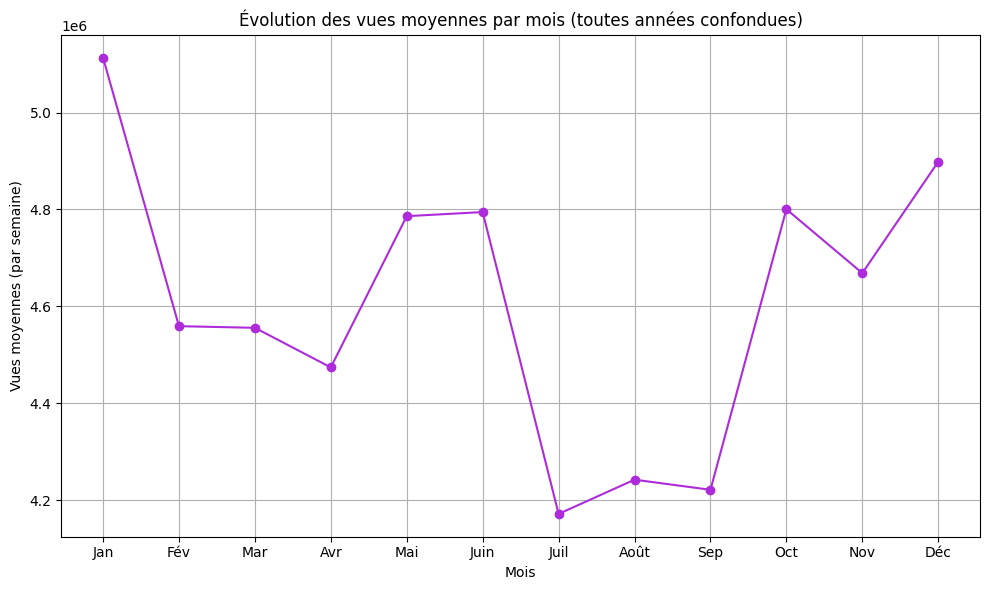

In [74]:
import pandas
import matplotlib.pyplot as plt

# Convertir la colonne 'week' en format datetime

df_top10_global['week'] = pandas.to_datetime(df_top10_global['week'])

# Extraire le mois (en ignorant l'année)

df_top10_global['month'] = df_top10_global['week'].dt.month

# Regrouper par mois et calculer la moyenne des vues

monthly_avg_views = df_top10_global.groupby('month')['weekly_views'].mean().reset_index()


# Tracer le graphique

plt.figure(figsize=(10, 6))

plt.plot(monthly_avg_views['month'], monthly_avg_views['weekly_views'], marker='o', color='#ad2bda')

plt.title('Évolution des vues moyennes par mois (toutes années confondues)')

plt.xlabel('Mois')

plt.ylabel('Vues moyennes (par semaine)')

plt.grid(True)

plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])

plt.tight_layout()

plt.show()

 <h1 style="color: orange; font-weight:700; text-decoration: underline;"> Conclusion : Performance de Netflix par rapport à d'autres plateformes, selon le score moyen de leurs films sur Rotten Tomatoes</h1>  

,Score moyen des films sur Rotten Tomatoes,Nombre de films
Platform,,
Disney+,58.314444,900
Hulu,60.190476,1008
Netflix,54.447939,3695
Prime Video,49.884202,3912


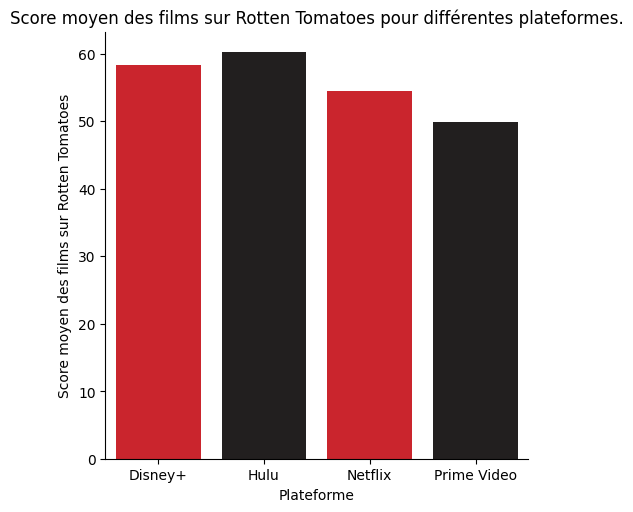

In [48]:
import pandas
import seaborn
# Changement dans la colonne "Rotten Tomatoes" pour enlever le "/100".
# Définition d'une fonction pour changer le type de données de la colonne "Rotten Tomatoes". On veut que ce soit des chaînes de caractères pour pouvoir 
# faire des "slicing" à l'aide de la fonction suivante.
def to_string(x):
    return str(x)
    
# Définition d'une fonction pour le "slicing" des chaînes de caractères.
def del100(x):
    return x[:-4]

# Application de la fonction "to_string" à la colonne "Rotten Tomatoes".
df_movies_diff_plat["Rotten Tomatoes"] = df_movies_diff_plat["Rotten Tomatoes"].apply(to_string)

# Application de la fonction "del100" à la colonne "Rotten Tomatoes".
df_movies_diff_plat["Rotten Tomatoes"] = df_movies_diff_plat["Rotten Tomatoes"].apply(del100)

# Conversion des valeurs de la colonne "Rotten Tomatoes" afin de permettre leur utilisation dans des calculs ultérieurs.
df_movies_diff_plat["Rotten Tomatoes"] = pandas.to_numeric(df_movies_diff_plat["Rotten Tomatoes"])

# Définition d'une fonction qui permettra ensuite de créer une seule colonne qui catégorisera les films en fonction de la plateforme sur laquelle ils 
# sont diffusés.
def categorize_platform(ligne):       # Prendra chaque ligne du Dataframe en argument
    if ligne['Netflix'] == 1:
        return 'Netflix'
    elif ligne['Hulu'] == 1:
        return 'Hulu'
    elif ligne['Prime Video'] == 1:
        return 'Prime Video'
    elif ligne['Disney+'] == 1:
        return 'Disney+'

# Application de la fonction pour obtenir une colonne "Platform" qui catégorise les filmes selon la plateforme sur laquelle ils sont diffusés.
df_movies_diff_plat['Platform'] = df_movies_diff_plat.apply(categorize_platform, axis=1)    # axis=1 pour que l'application se fasse ligne par ligne

# Calcul de la moyenne des scores de Rotten Tomatoes par plateforme.
df_movies_diff_plat_RT_score_mean = df_movies_diff_plat.groupby("Platform")[["Rotten Tomatoes"]].mean()

# Calcul du nombre de filmes par plateforme dans le jeu de données
df_movies_diff_plat_nb_ID = df_movies_diff_plat.groupby("Platform")[["ID"]].count()

# Joindure des deux derniers dataframe avec la clé "Platform"
df_movies_diff_join = df_movies_diff_plat_RT_score_mean.join(df_movies_diff_plat_nb_ID)

# Changement de nom de colonnes
df_movies_diff_join.columns = ["Score moyen des films sur Rotten Tomatoes", "Nombre de films"]
display(df_movies_diff_join)

# Visualisation représentant les données
df_movies_diff_plat_RT_score_mean.reset_index()
netflix_palette = ["#E50914", "#221f1f", "#E50914", "#221f1f"]
graph = seaborn.catplot(kind="bar", x="Platform", y="Rotten Tomatoes", data=df_movies_diff_plat_RT_score_mean, hue="Platform", palette=netflix_palette)
graph.set(xlabel="Plateforme", ylabel="Score moyen des films sur Rotten Tomatoes", \
          title="Score moyen des films sur Rotten Tomatoes pour différentes plateformes.")